<a class="anchor" id="0"></a>
# **Time Series Modeling**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


## **Import data**

In [ ]:
def get_df():
    df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/AirPassengers.csv")
    df.head()
    df.columns = ['date','#passengers']
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    return df

df = get_df()
df.head(10)

date  #passengers  year  month
0 1949-01-01          112  1949      1
1 1949-02-01          118  1949      2
2 1949-03-01          132  1949      3
3 1949-04-01          129  1949      4
4 1949-05-01          121  1949      5
5 1949-06-01          135  1949      6
6 1949-07-01          148  1949      7
7 1949-08-01          148  1949      8
8 1949-09-01          136  1949      9
9 1949-10-01          119  1949     10

## **Visualize the Time Series**

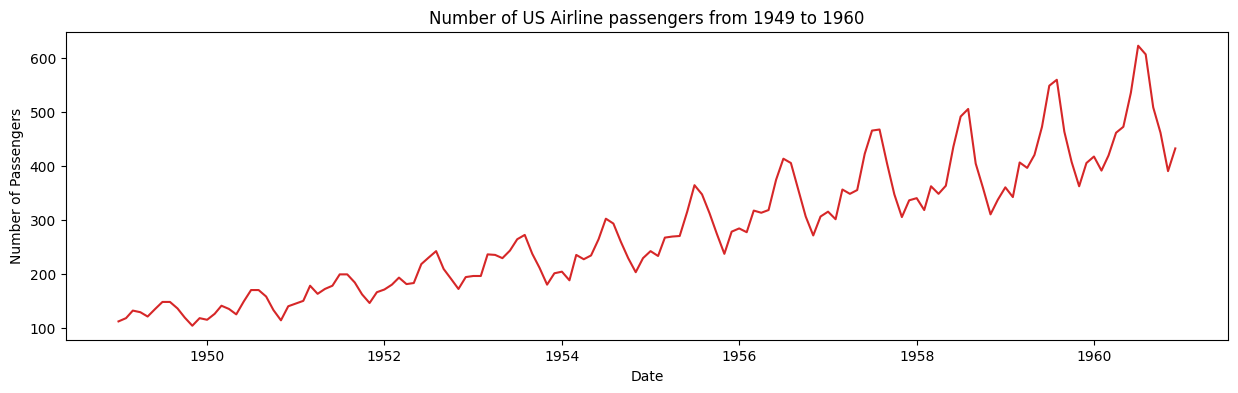

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['date'], y=df['#passengers'], title='Number of US Airline passengers from 1949 to 1960', color="tab:red")

- Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

### Seasonal Plot of a Time Series


In [ ]:
df2 = df.pivot(index='month', columns='year', values='#passengers')
df2.head(12)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
1       112   115   145   171   196   204   242   284   315   340   360   417
2       118   126   150   180   196   188   233   277   301   318   342   391
3       132   141   178   193   236   235   267   317   356   362   406   419
4       129   135   163   181   235   227   269   313   348   348   396   461
5       121   125   172   183   229   234   270   318   355   363   420   472
6       135   149   178   218   243   264   315   374   422   435   472   535
7       148   170   199   230   264   302   364   413   465   491   548   622
8       148   170   199   242   272   293   347   405   467   505   559   606
9       136   158   184   209   237   259   312   355   404   404   463   508
10      119   133   162   191   211   229   274   306   347   359   407   461
11      104   114   146   172   180   203   237   271   305   310   362   390
12      118   140   166   194   201   229   278   306   336   337   405   432

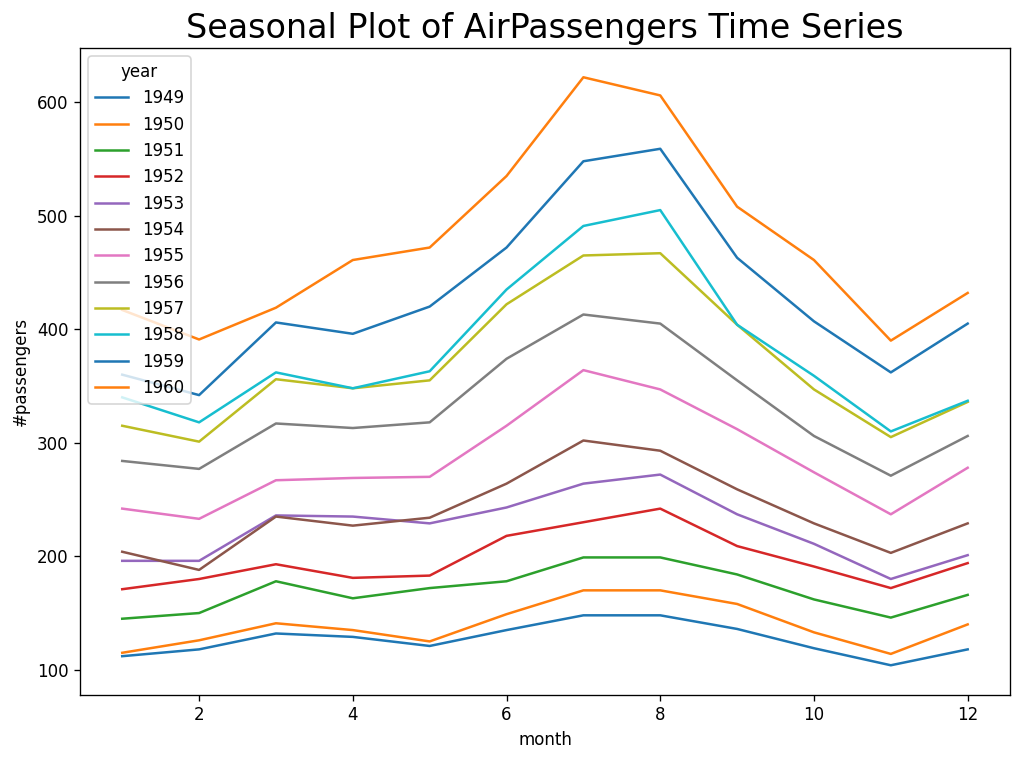

In [ ]:
df2.plot()
plt.title("Seasonal Plot of AirPassengers Time Series", fontsize=20)
plt.ylabel("#passengers")
plt.show()

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

- Chúng ta có thể nhóm dữ liệu thành các khoảng thời gian theo mùa và xem các giá trị phân phối trong một năm hoặc một tháng nhất định và cách nó so sánh qua thời gian.

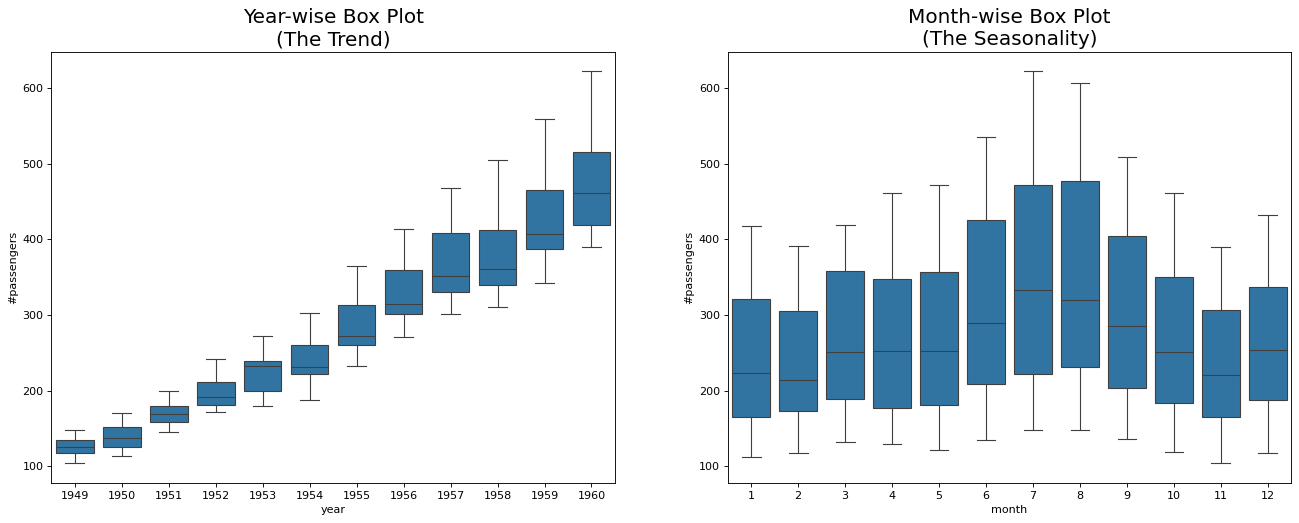

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='#passengers', data=df, ax=axes[0])
sns.boxplot(x='month', y='#passengers', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

- Các boxplot làm cho phân phối theo năm và tháng trở nên rõ ràng hơn. Ngoài ra, trong boxplot theo tháng, các tháng từ 6 đến 9 rõ ràng có số lượng hành khách cao hơn, có thể được giải thích là do mùa du lịch nghỉ hè.




# Modelling using statstools

## Correlation

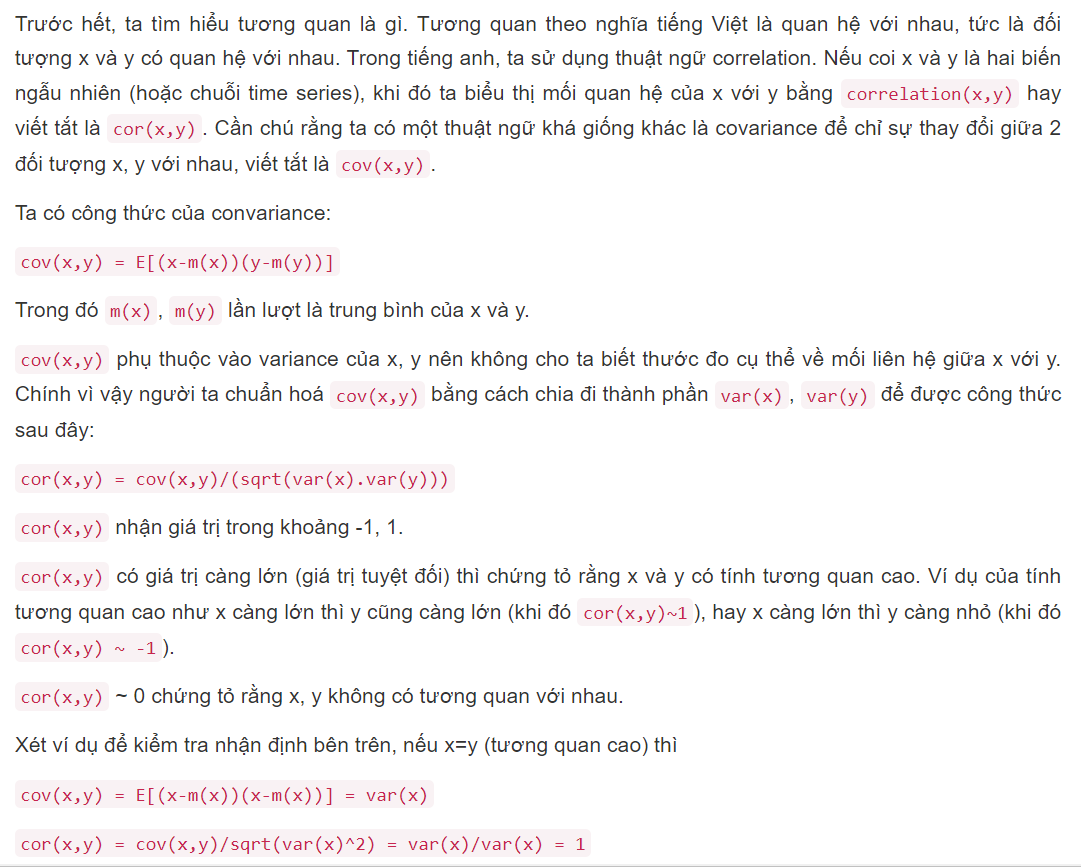

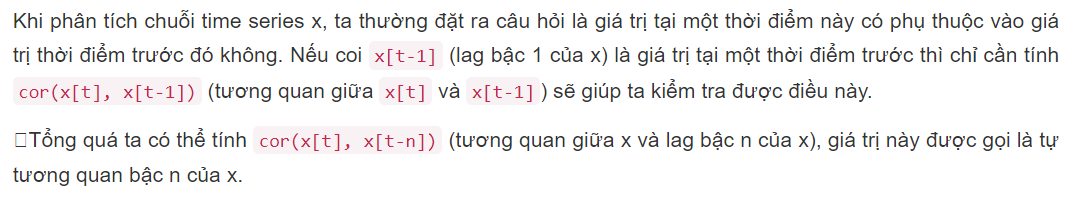


In [ ]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.metrics import mean_squared_error

In [ ]:
df = get_df()
dataset = df['#passengers']
dataframe = pd.concat([dataset.shift(1), dataset], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.960195
t+1  0.960195  1.000000


## Autocorrelation Plots

- Chúng ta có thể vẽ biểu đồ hệ số tương quan (correlation coefficient) cho mỗi biến độ trễ (lag variable).


- Điều này có thể cho một ý tưởng nhanh về các biến độ trễ nào có thể là ứng viên tốt cho việc sử dụng trong một mô hình dự đoán và cách mối quan hệ giữa quan sát và các giá trị lịch sử của nó thay đổi theo thời gian.

- Biểu đồ cung cấp số thứ tự biến độ trễ theo trục x và giá trị hệ số tương quan giữa -1 và 1 trên trục y.

- Biểu đồ cũng bao gồm các đường nét liền và đứt là giá trị khoảng tin cậy 95% và 99% cho các giá trị tương quan.

- Các giá trị tương quan vượt qua các đường này có ý nghĩa hơn các giá trị dưới đường, cung cấp ngưỡng hoặc điểm cắt để lựa chọn các giá trị biến độ trễ có liên quan hơn.


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

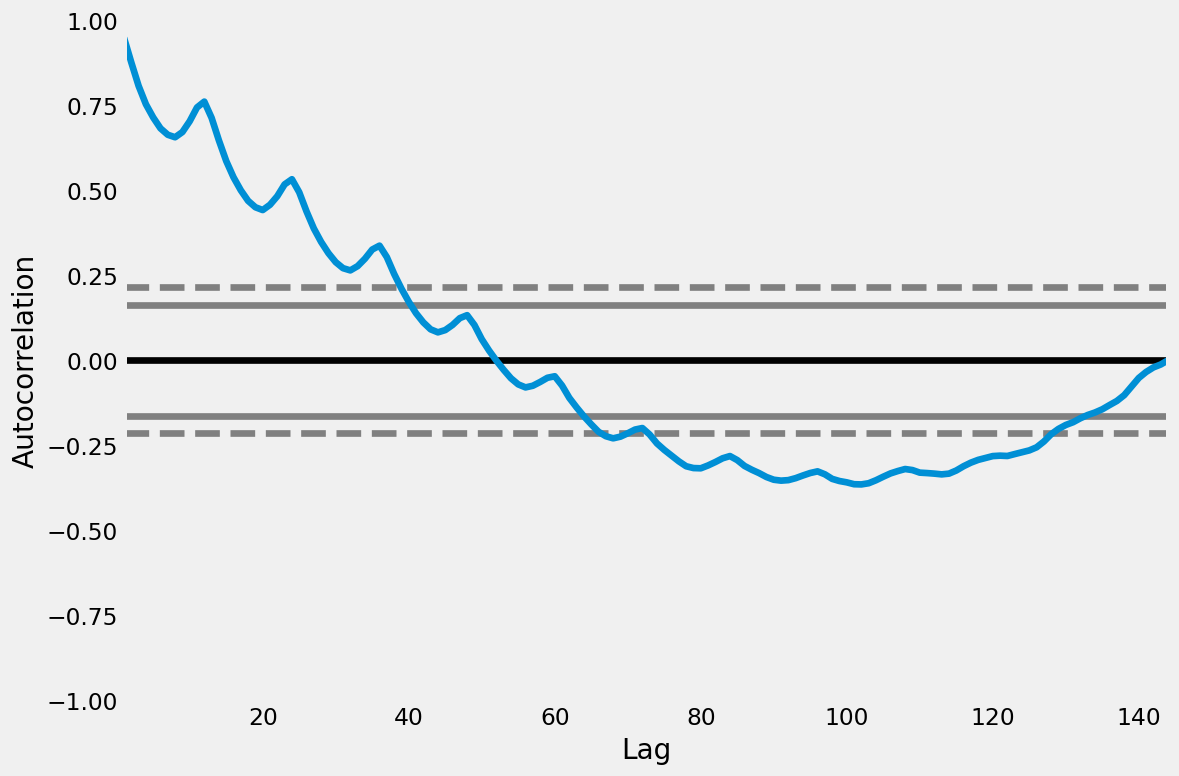

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dataset)


- Thư viện statsmodels cũng cung cấp một phiên bản của đồ thị trong hàm plot_acf() dưới dạng đồ thị đường. Hàm này cũng tính toán và hiển thị giá trị tương quan, nhưng đồ thị đường được vẽ để hiển thị tốt hơn phần mềm tích hợp của hàm autocorrelation_plot() trong matplotlib. Nó cũng cung cấp cho chúng ta khả năng dễ dàng chỉ định số lượng lag để hiển thị trên trục x, cho phép chúng ta tập trung vào những lag chính và bỏ qua những giá trị lag không quan trọng.



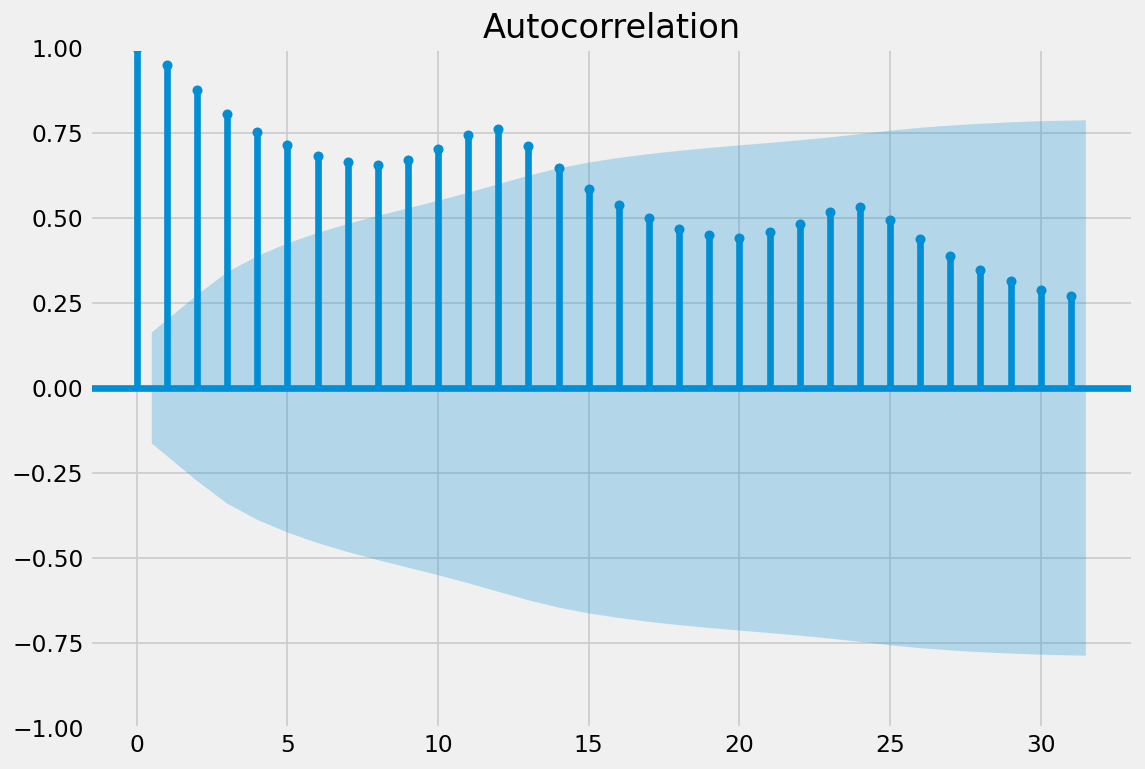

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset, lags=31)
plt.show()

**Nó cho thấy một mối tương quan dương mạnh (0,96) giữa quan sát và giá trị trễ = 1.**

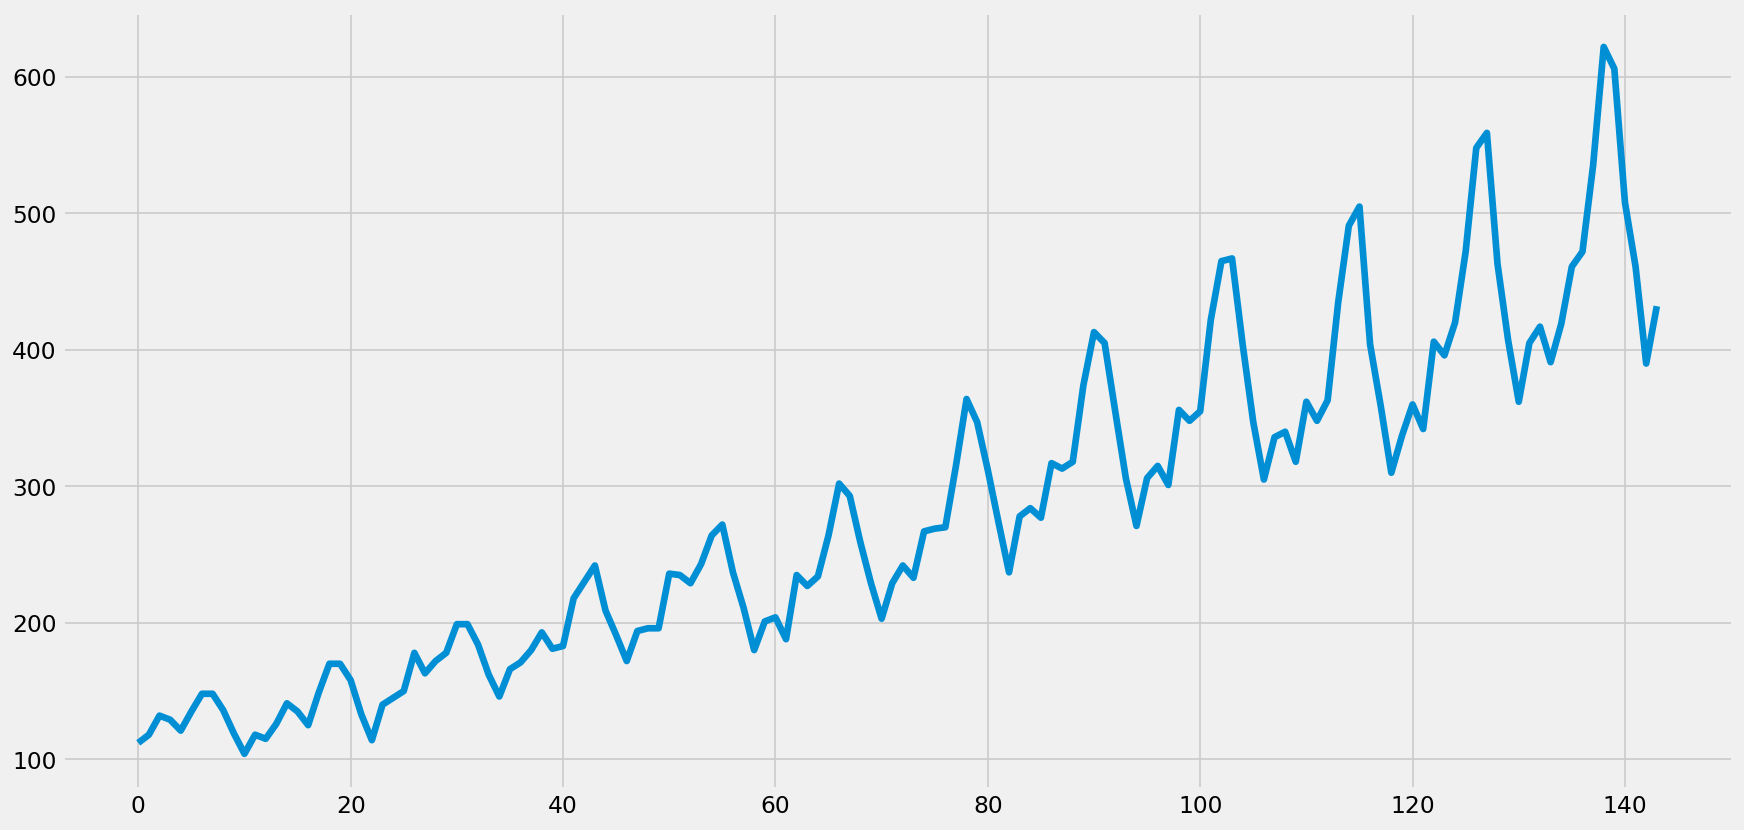

In [ ]:
df = get_df()
plt.figure(figsize=(16,8))
plt.plot(df['#passengers'])

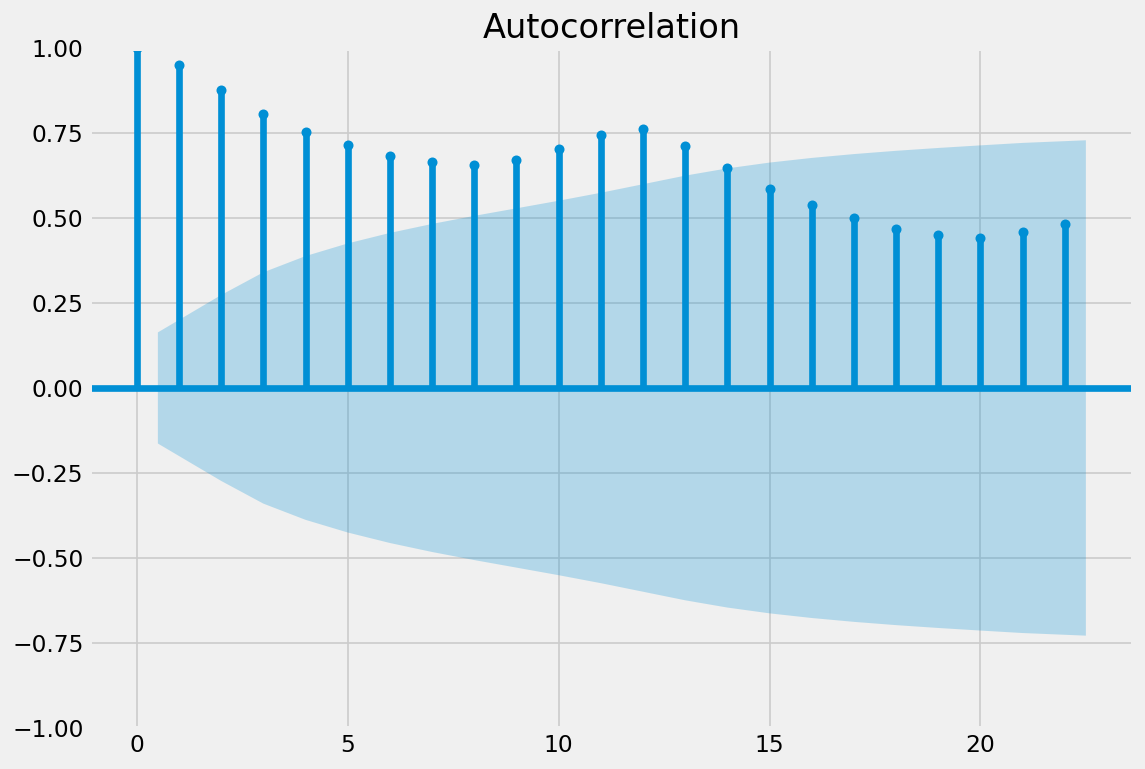

In [ ]:
plot_acf(df['#passengers'])
plt.show()

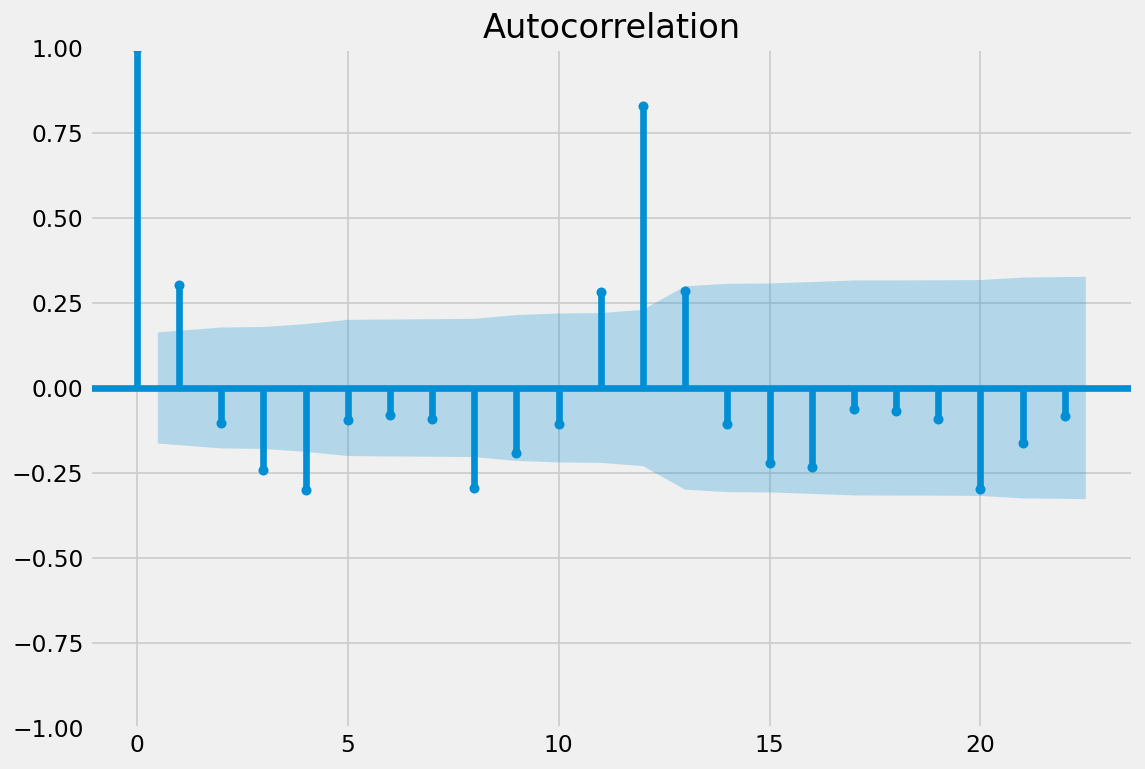

In [ ]:
# First Order Differencing
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)

plot_acf(df['#passengers_diff1'])
dataset = df['#passengers_diff1'].values

## White noise

White noise có các đặc điểm sau:

* Trung bình không đổi
* Phương sai không đổi
* Giá trị tương quan bằng 0 ở tất cả các độ trễ


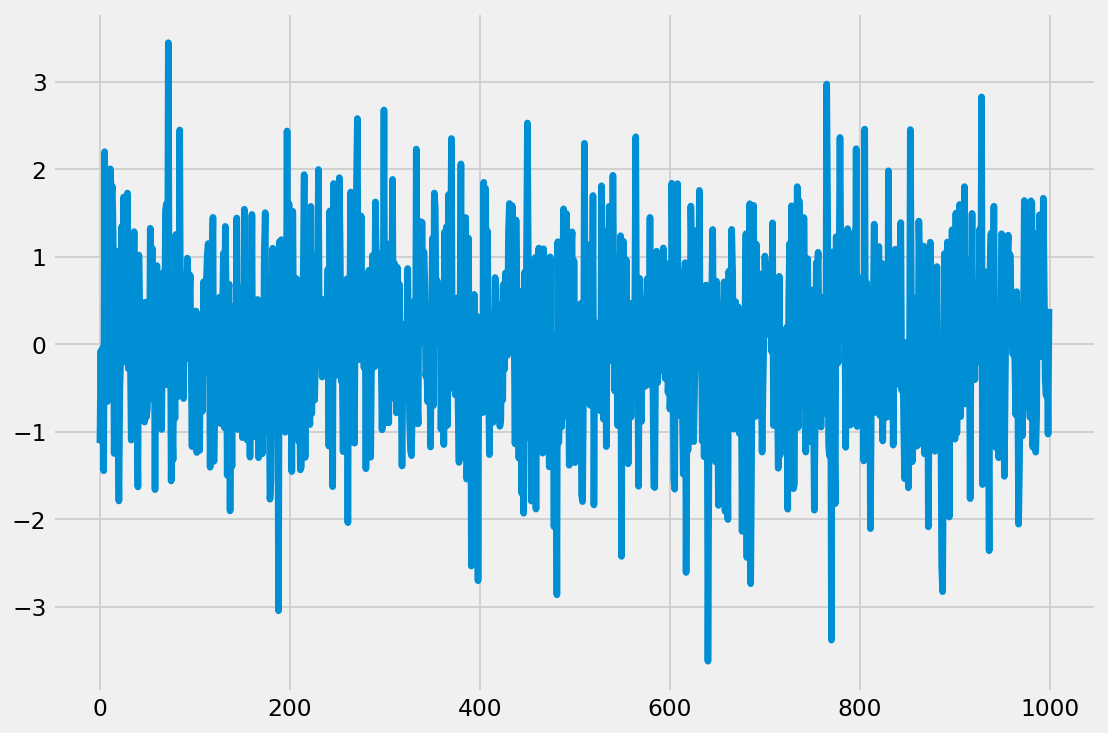

In [ ]:
import numpy as np

white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

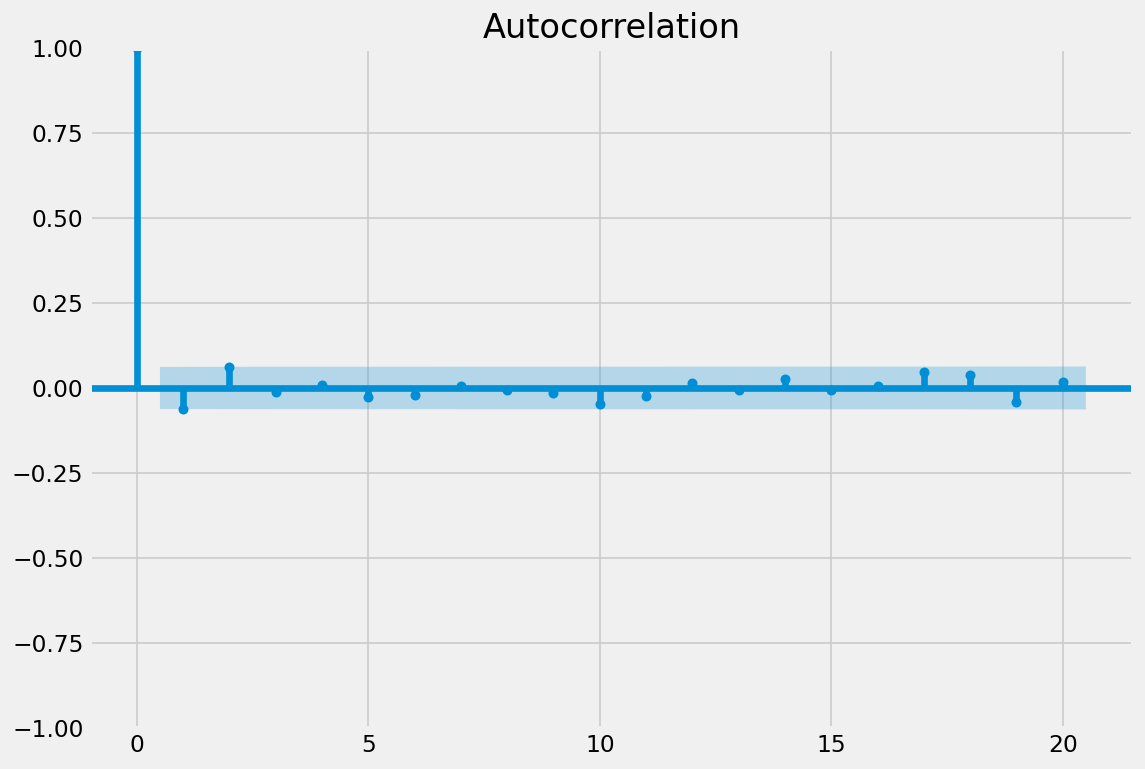

In [ ]:
# Plotting autocorrelation of white noise
plot_acf(white_noise, lags=20)
plt.show()

- Hãy xem cách tất cả các độ trễ đều không có ý nghĩa thống kê vì chúng nằm trong khoảng tin cậy (phần được tô màu).



## Random Walk

Một bước đi ngẫu nhiên (random walk) là một đối tượng toán học, được biết đến như một quá trình ngẫu nhiên hoặc ngẫu nhiên mô tả một đường đi bao gồm một loạt các bước ngẫu nhiên trên một không gian toán học như các số nguyên.


Nói chung, nếu chúng ta nói về cổ phiếu, Giá hôm nay = Giá ngày hôm qua + Nhiễu


# P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub>

- Các bước ngẫu nhiên không thể được dự báo vì nó là ngẫu nhiên.

- Random Walk với Drift (drift (μ) có trung bình bằng không)


#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub>


Regression test for random walk

#### P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
<br>

Test:

- H<sub>0</sub>: β = 1 (This is a random walk)
- H<sub>1</sub>: β < 1 (This is not a random walk)
<br>

Dickey-Fuller Test:

- H<sub>0</sub>: β = 0 (This is a random walk)
- H<sub>1</sub>: β < 0 (This is not a random walk)

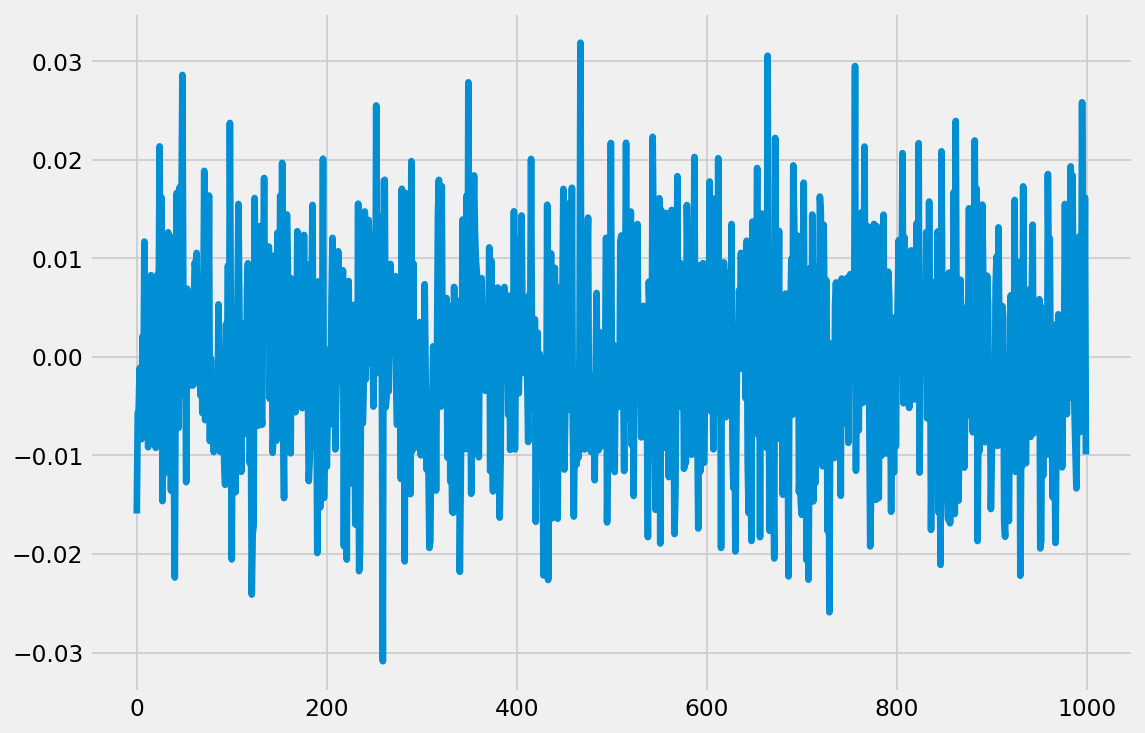

In [ ]:
random_walk = np.random.normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

## AR (Autogressive) model

- Mô hình tự hồi quy xác định rằng biến đầu ra phụ thuộc tuyến tính vào giá trị trước đó của nó và một thuật ngữ ngẫu nhiên (một thuật ngữ khó dự đoán); do đó mô hình có dạng một phương trình chênh lệch ngẫu nhiên (hoặc mối quan hệ lặp định không nên nhầm lẫn với phương trình vi phân).







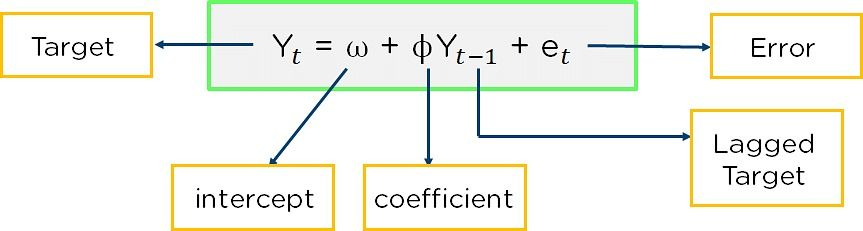

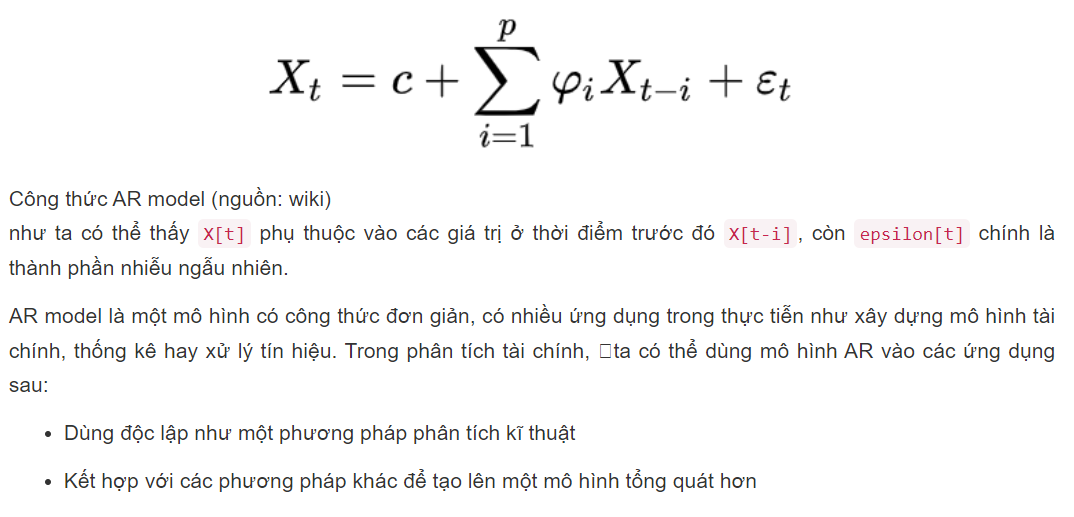

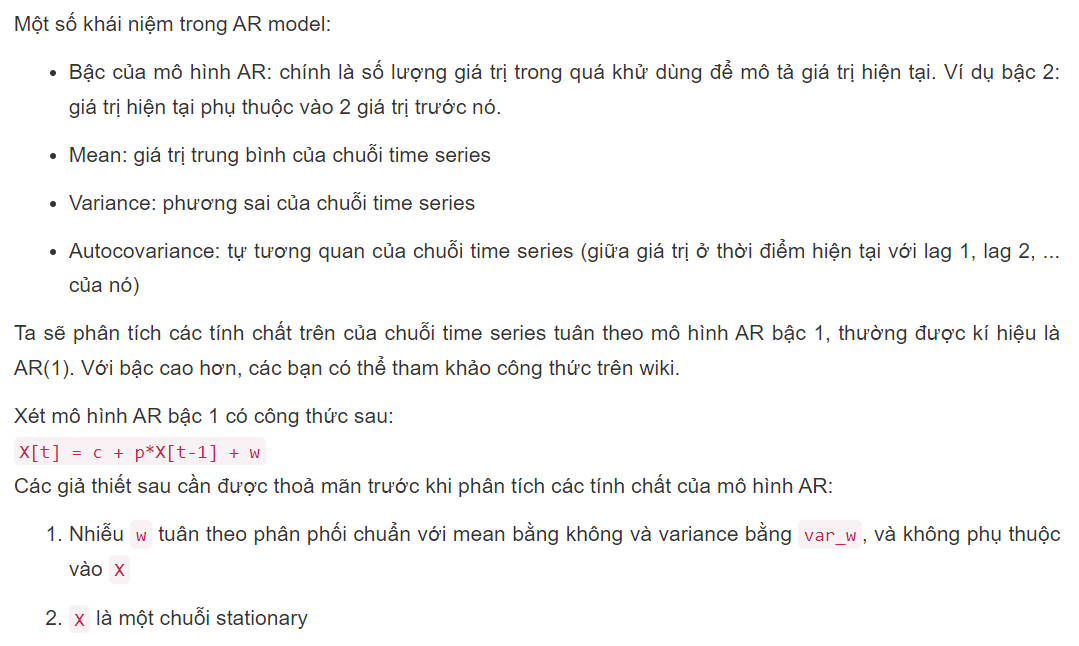

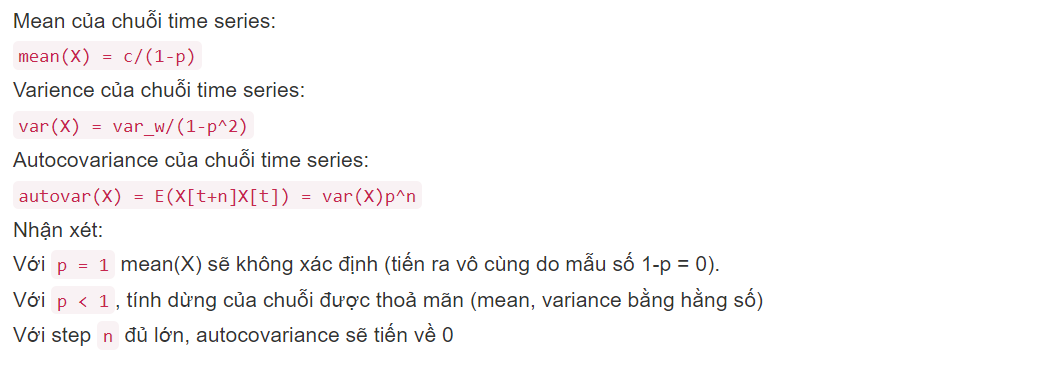

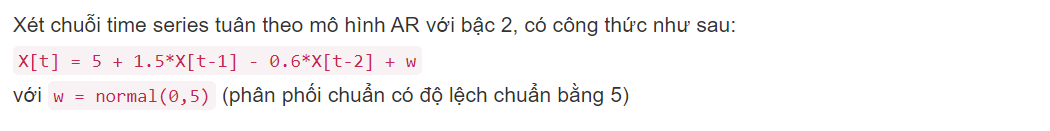

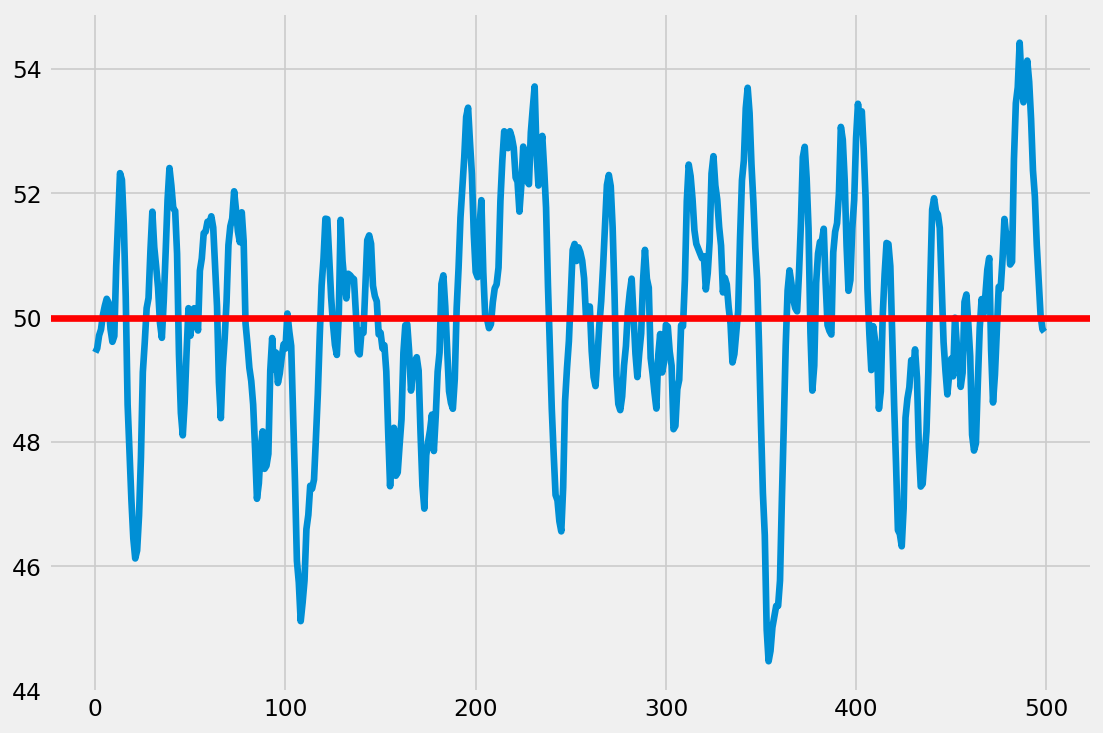

In [ ]:
p1 = 1.5
p2 = -0.6
c = 5
w = 0.5
T = 500
mean = c/(1-p1-p2)

ar_data = np.zeros(T)
ar_data[0] = mean + np.random.normal(0, w)
ar_data[1] = mean + np.random.normal(0, w)
for t in range(2, T):
    ar_data[t] = c + p1*ar_data[t-1] + p2*ar_data[t-2] + np.random.normal(0, w)


plt.plot(ar_data)
plt.axhline(y=mean, color='r', linestyle='-')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

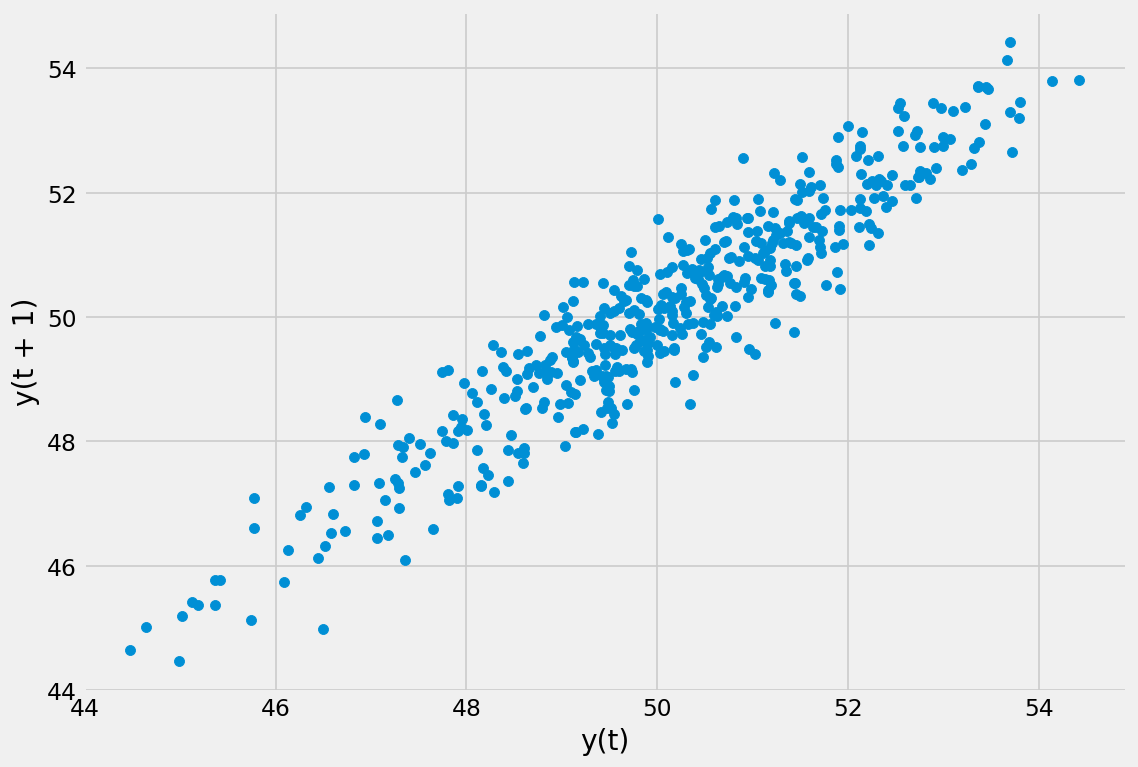

In [ ]:
# plot correlation
from pandas.plotting import lag_plot
lag_plot(pd.DataFrame(ar_data))

Dễ nhận thấy y[t+1] phụ thuộc vào y[t] theo quan hệ tuyến tính. Ta sẽ sử dụng thư viện statsmodels để tìm các tham số cho mô hình AR.


In [ ]:
print(ar_data)

[49.44234461 49.50557044 49.71439143 49.8102133  50.04211859 50.18856869
 50.30400132 50.24253512 49.81739972 49.61196923 49.70448988 50.82555917
 51.58993556 52.32499459 52.21720657 51.49772594 50.34245305 48.6028265
 47.81528828 47.06045061 46.44602206 46.12726932 46.25604034 46.81826494
 47.74894205 49.12339167 49.60061037 50.15294191 50.31689468 51.07976282
 51.70527152 51.13435508 50.82430923 50.48352108 49.92073564 49.67629497
 50.27650144 51.05961924 51.89290413 52.40743515 52.12523128 51.75994715
 51.71718428 51.02883363 49.40741305 48.46771603 48.10791862 48.6367664
 49.44657561 50.15311929 49.71021372 50.07111063 50.15278594 50.03418883
 49.7941884  50.75713444 50.95394398 51.35971641 51.38322255 51.54362735
 51.51337723 51.63084793 51.45139145 50.81634586 50.18438326 48.95839987
 48.38421608 49.19614101 49.65303262 50.25163584 51.16783593 51.47072173
 51.5964687  52.03319821 51.72806808 51.38587426 51.21419605 51.69531306
 51.23708947 49.90549766 49.5754644  49.19463913 48.9

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Splitting into training and testing sets
train_size = int(len(ar_data) * 0.8)
train, test = ar_data[:train_size], ar_data[train_size:]

In [ ]:
# Fit the AutoReg model on the training data
model = AutoReg(train, lags=5)      # lags = (1, 2, 3, 4, 5)
model_01 = model.fit()             # get the fitted model.

# Print the model summary
print(model_01.summary())
print('AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'.format(model_01.aic, model_01.hqic, model_01.bic))

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  400
Model:                     AutoReg(5)   Log Likelihood                -266.068
Method:               Conditional MLE   S.D. of innovations              0.475
Date:                Wed, 22 May 2024   AIC                            546.135
Time:                        00:43:06   BIC                            573.988
Sample:                             5   HQIC                           557.171
                                  400                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4327      0.793      5.590      0.000       2.878       5.987
y.L1           1.5454      0.050     30.719      0.000       1.447       1.644
y.L2          -0.6795      0.093     -7.333      0.0

### AIC - Akaike Information Criteria

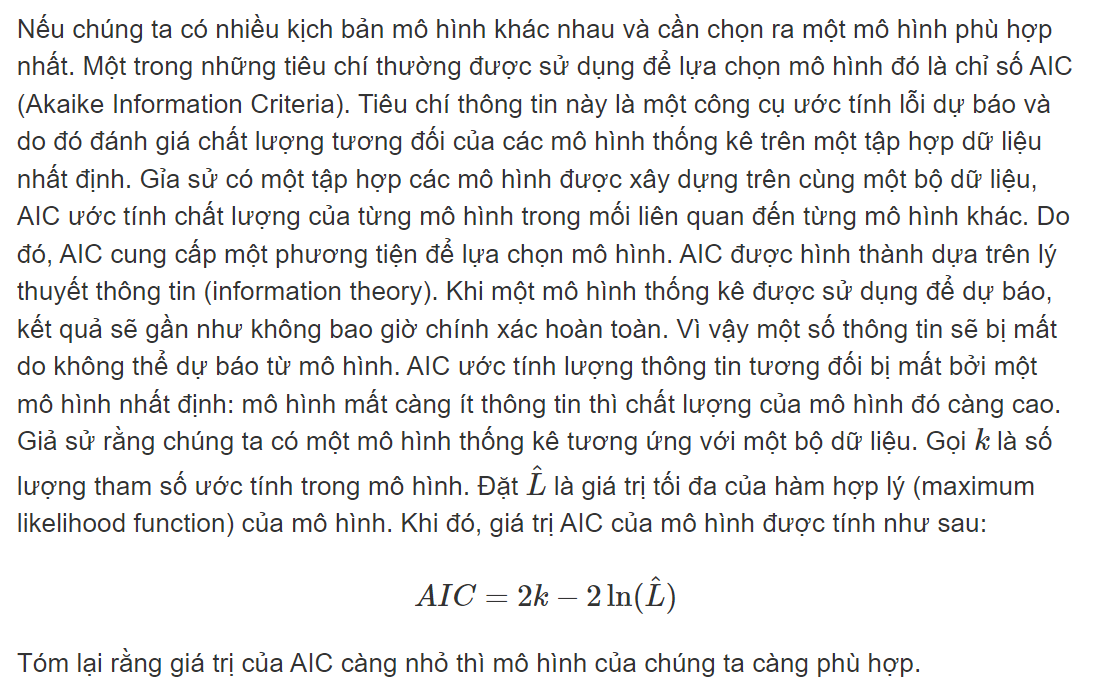

In [ ]:
## Install performance metrics
## https://github.com/thieu1995/PerMetrics
!pip install permetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Making predictions
y_pred = model_01.predict(start=train_size, end=len(ar_data)-1, dynamic=False)

# Calculate performance metrics
from permetrics import RegressionMetric

evaluator = RegressionMetric(test, y_pred)
print(evaluator.get_metrics_by_list_names(["RMSE", "MAE", "MAPE", "R2", "NSE", "KGE"]))

{'RMSE': 1.755060690116314, 'MAE': 1.3844639511341144, 'MAPE': 0.027461216588588497, 'R2': 0.09429778602113392, 'NSE': 0.09429778602113392, 'KGE': -0.03949012688663989}


In [ ]:
## Draw the results

def draw_true_pred(y_true, y_pred):
    # plot results
    plt.plot(y_true)
    plt.plot(y_pred, color='red')
    plt.show()

def draw_auto_regression_result(data_length, train, test, y_pred):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(train, label='Train', color="green")
    plt.plot(np.arange(train_size, data_length), test, label='Test')
    plt.plot(np.arange(train_size, data_length), y_pred, label='Predictions', color='red')
    plt.legend()
    plt.title('AutoReg Model Predictions')
    plt.show()


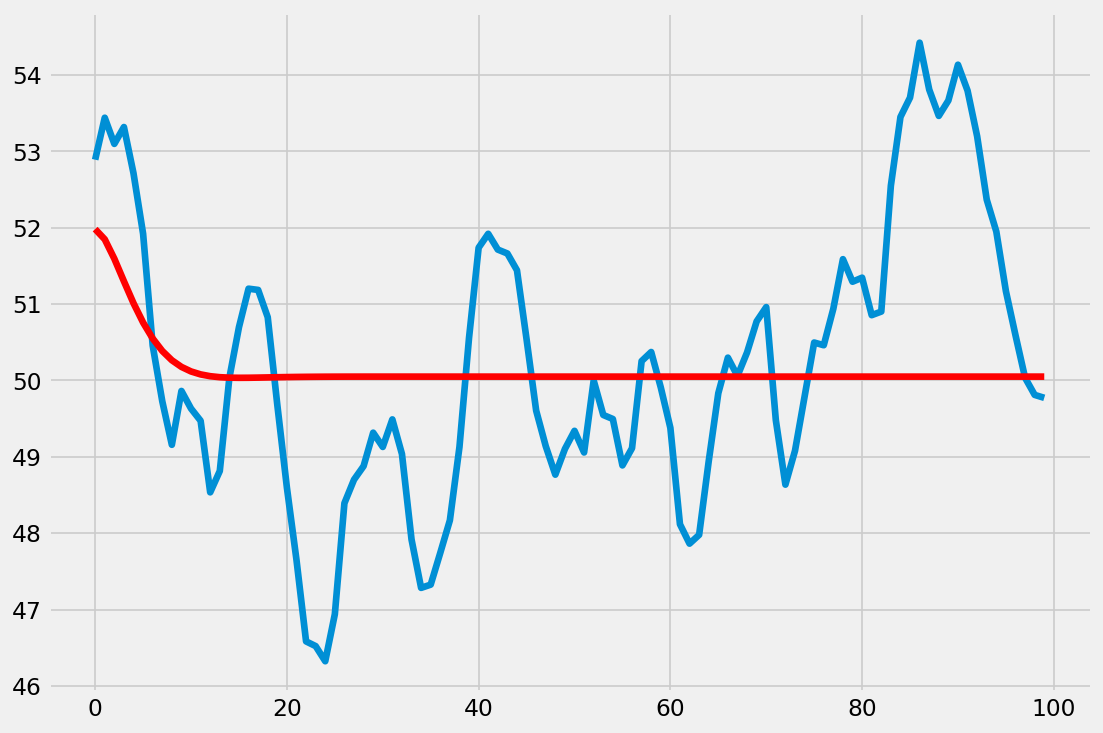

In [ ]:
## Draw true and pred
draw_true_pred(test, y_pred)

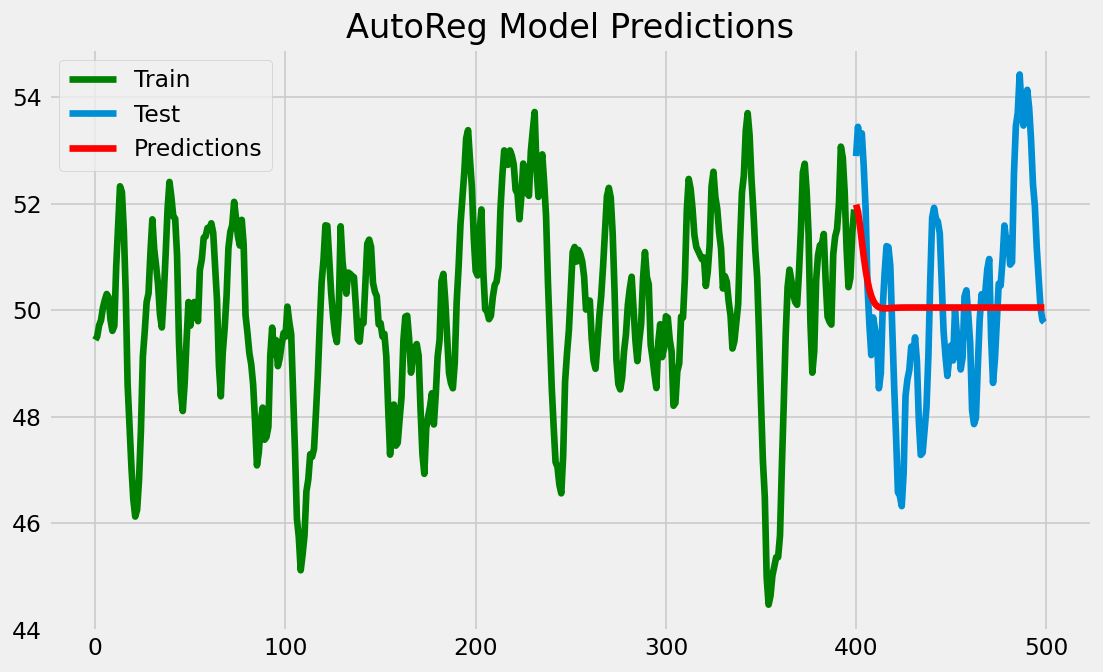

In [ ]:
## Draw train, true, and pred
draw_auto_regression_result(len(ar_data), train, test, y_pred)

**Model 01 kết quả không tốt, khả năng do giá trị lags mà ta đã chọn, thử các giá trị lags khác**

In [ ]:
model_02 =  AutoReg(ar_data, lags=(1, 3, 5, 6)).fit()         # Lag = (1, 3, 5, 6)
print('AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'.format(model_02.aic, model_02.hqic, model_02.bic))

AIC: 769.543, HQIC: 779.442, BIC: 794.758


In [ ]:
# Making predictions
y_pred = model_02.predict(start=train_size, end=len(ar_data)-1, dynamic=False)

# Calculate performance metrics
evaluator = RegressionMetric(test, y_pred)
print(evaluator.get_metrics_by_list_names(["RMSE", "MAE", "MAPE", "R2", "NSE", "KGE"]))

{'RMSE': 0.5715027372063765, 'MAE': 0.45409605465713326, 'MAPE': 0.009045143063549982, 'R2': 0.9039631778282854, 'NSE': 0.9039631778282854, 'KGE': 0.9400961800880694}


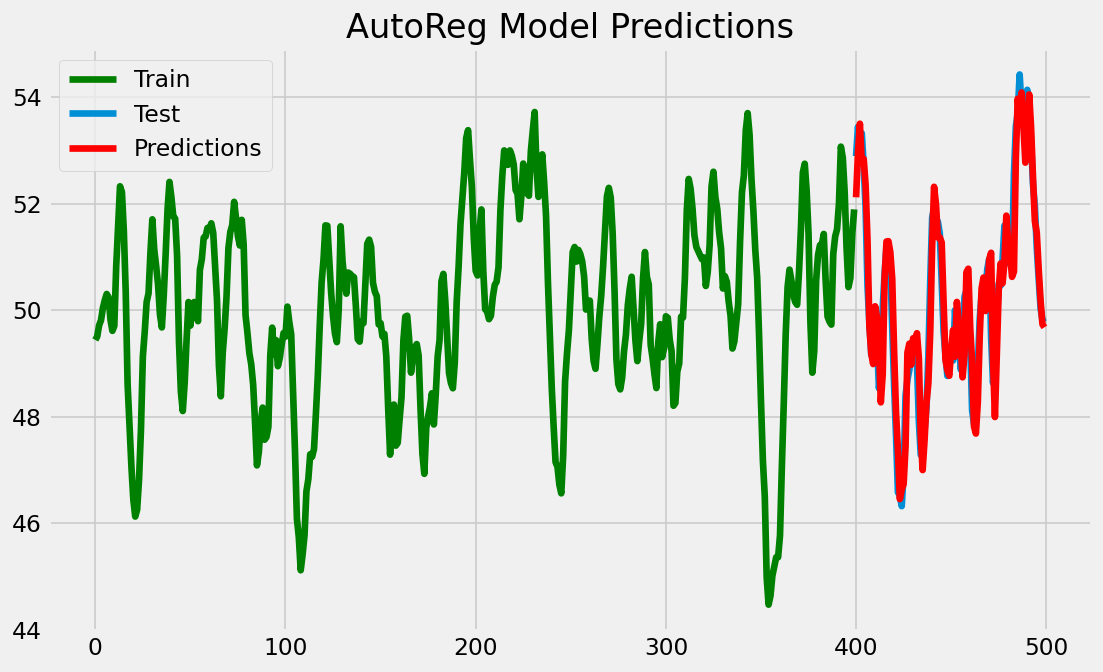

In [ ]:
## Draw train, true, and pred
draw_auto_regression_result(len(ar_data), train, test, y_pred)

**Kết quả khá là tuyệt vời**

Tuy nhiên, ta có thể xét đến vụ mùa và chu kì khi dùng model AR này thì sao?

In [ ]:
## Define the model
model = AutoReg(ar_data, lags=6, seasonal=True, period=12)      # lags = (1, 2, 3, 4, 5, 6)
model_03 = model.fit()
print('AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'.format(model_03.aic, model_03.hqic, model_03.bic))
print(f"Params of model: Trend={model.trend}, Seasonal={model.seasonal}, Period={ model.period}")

AIC: 722.067, HQIC: 753.416, BIC: 801.915
Params of model: Trend=c, Seasonal=True, Period=12


In [ ]:
# Making predictions
y_pred = model_03.predict(start=train_size, end=len(ar_data)-1, dynamic=False)

# Calculate performance metrics
evaluator = RegressionMetric(test, y_pred)
print(evaluator.get_metrics_by_list_names(["RMSE", "MAE", "MAPE", "R2", "NSE", "KGE"]))

{'RMSE': 0.542435212521127, 'MAE': 0.43377633351729633, 'MAPE': 0.008634326239945523, 'R2': 0.9134839067764156, 'NSE': 0.9134839067764156, 'KGE': 0.9489172102197402}


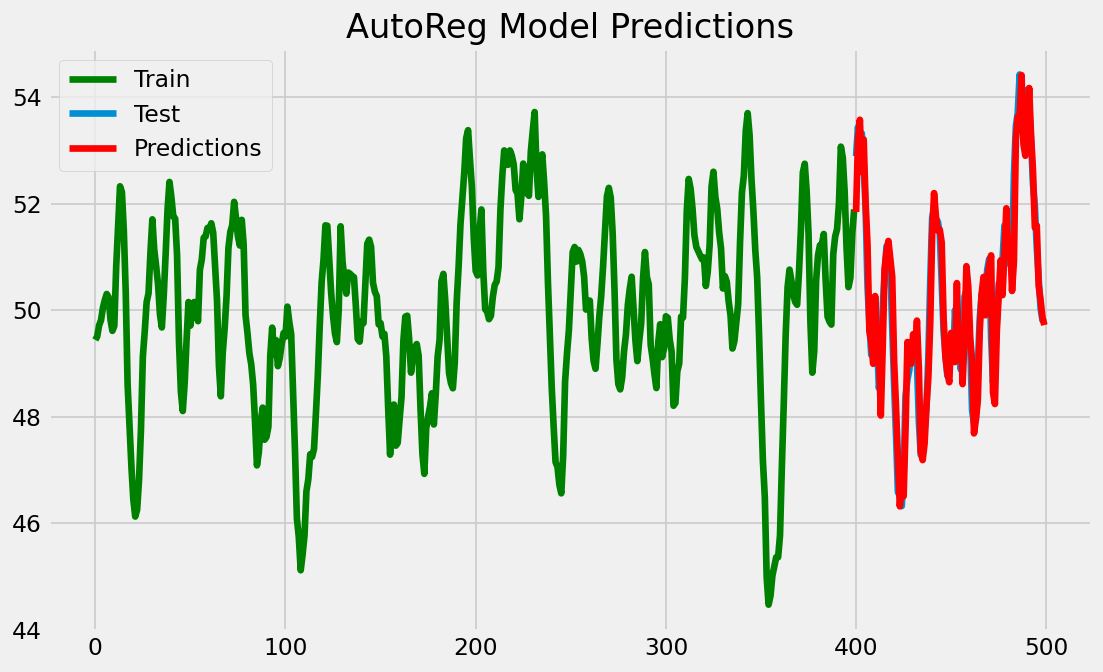

In [ ]:
## Draw train, true, and pred
draw_auto_regression_result(len(ar_data), train, test, y_pred)

**Kết quả còn tốt hơn model 02. Do vậy, ta nghĩ đến trường hợp là duyệt tất cả các tham số bằng cách đơn giản là dùng GridSearch. Hay là dùng brute force để duyệt tất cả các khả năng của các tham số**

In [ ]:
## Define the function that get the best result based on AIC metric.

def get_ar_model_results(data_length=None, train=None, test=None, lags=3, seasonal=False, period=12):
    model = AutoReg(train, lags=lags, seasonal=seasonal, period=period)
    model_results = model.fit()
    # Results on training set
    res_train = {
        "aic": model_results.aic,
        "hqic": model_results.hqic,
        "bic": model_results.bic,
    }

    ## Results on testing set
    pred = model_results.predict(start=len(train), end=data_length-1, dynamic=False)
    evaluator = RegressionMetric(test, pred)
    res_test = evaluator.get_metrics_by_list_names(["RMSE", "MAE", "MAPE", "R2", "NSE", "KGE"])

    return {**res_train, **res_test}


list_lags = [3, 6, 9, 12]
list_seasonal = [True, False]
list_period = [6, 12, 18, 24]

for id_lag, lags in enumerate(list_lags):
    for id_ss, seasonal in enumerate(list_seasonal):
        for id_period, period in enumerate(list_period):
            res = get_ar_model_results(len(ar_data), train, test, lags, seasonal, period)
            print(f"Lag={lags}, Seasonal={seasonal}, Period={period}, {res}")


Lag=3, Seasonal=True, Period=6, {'aic': 546.4417047789336, 'hqic': 562.2232766256257, 'bic': 586.2810675858055, 'RMSE': 1.7536833871625797, 'MAE': 1.37774700393746, 'MAPE': 0.027324079965094002, 'R2': 0.09571874755921783, 'NSE': 0.09571874755921783, 'KGE': -0.03735986721033924}
Lag=3, Seasonal=True, Period=12, {'aic': 549.5770182704568, 'hqic': 574.827533225164, 'bic': 613.3199987614519, 'RMSE': 1.8069043086782126, 'MAE': 1.4126412581211312, 'MAPE': 0.028015209854896014, 'R2': 0.03999950190448209, 'NSE': 0.03999950190448209, 'KGE': -0.1392826315786846}
Lag=3, Seasonal=True, Period=18, {'aic': 549.8248100003373, 'hqic': 584.5442680630596, 'bic': 637.4714081754554, 'RMSE': 1.7792780375918487, 'MAE': 1.4502367461582952, 'MAPE': 0.02875438957186974, 'R2': 0.06913052843722922, 'NSE': 0.06913052843722922, 'KGE': -0.06219169378725553}
Lag=3, Seasonal=True, Period=24, {'aic': 557.3944059446919, 'hqic': 601.5828071154294, 'bic': 668.9446218039333, 'RMSE': 1.7707606793469546, 'MAE': 1.3986652478

Coefficients: [ 6.13206706 -0.12797557 -0.22202169 -0.17613201 -0.23070813 -0.11307161
 -0.27597379 -0.13393128 -0.26920597 -0.13883393 -0.28480354 -0.1135323
  0.79433223]
predicted=58.413894, expected=28.000000
predicted=-13.195322, expected=42.000000
predicted=27.551248, expected=11.000000
predicted=51.996432, expected=63.000000
predicted=82.428013, expected=87.000000
predicted=11.451185, expected=-16.000000
predicted=-106.577475, expected=-98.000000
predicted=-62.869247, expected=-47.000000
predicted=-51.069072, expected=-71.000000
predicted=51.037145, expected=42.000000
Test RMSE: 24.383


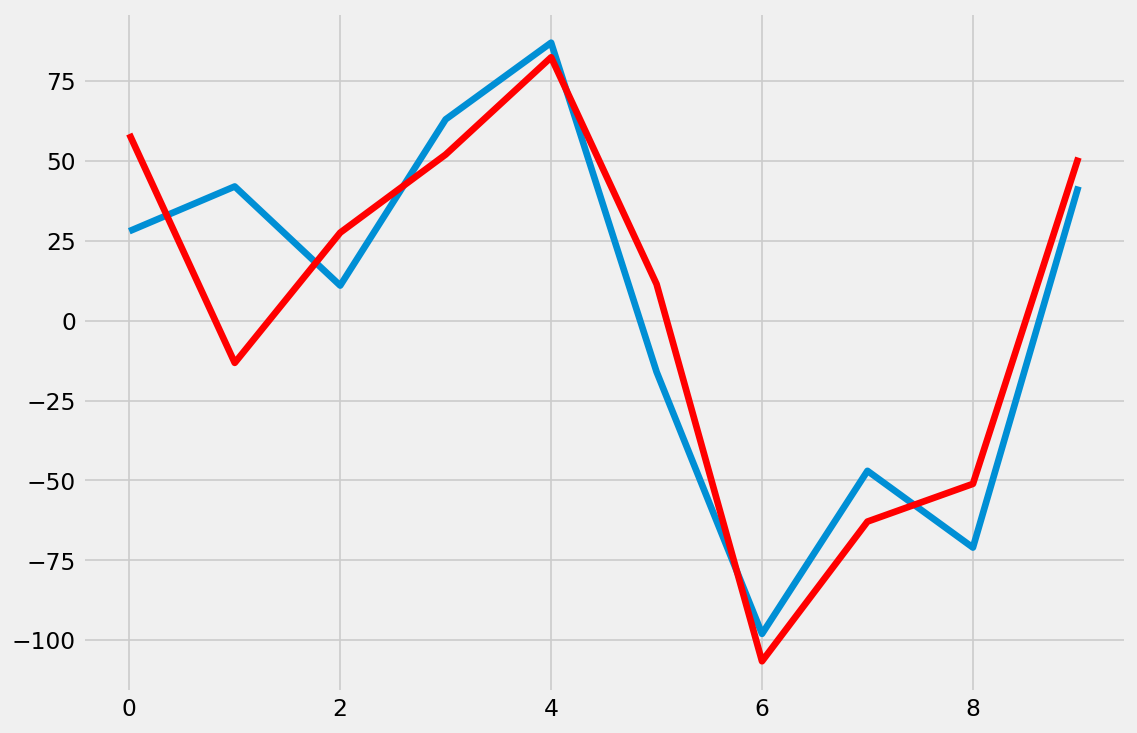

In [ ]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train autoregression
model = AutoReg(train, lags=12)		# lags = (1, 2, 3, ..., 12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Moving Average (Trung bình di động)

- Trong phân tích chuỗi thời gian, mô hình trung bình di động (MA), còn được gọi là quá trình trung bình di động, là một phương pháp phổ biến để mô hình chuỗi thời gian một biến. Mô hình trung bình di động chỉ ra rằng biến đầu ra phụ thuộc tuyến tính vào giá trị hiện tại và các giá trị quá khứ của một thuật ngữ ngẫu nhiên (không thể dự đoán hoàn toàn).

- Cùng với mô hình tự hồi quy (AR), mô hình trung bình di động là một trường hợp đặc biệt và thành phần chính của các mô hình ARMA và ARIMA phức tạp hơn về cấu trúc ngẫu nhiên.



Mô hình MA là một phương pháp phổ biến dùng trong mô hình hoá chuỗi time series, nó cùng với phương pháp AutoRegressive sẽ tạo nên mô hình tổng quát hơn ARIMA. Về đặc điểm thì mô hình MA thể hiện rằng output (giá trị của chuỗi thời gian) sẽ phụ thuộc tuyến tính vào giá trị hiện tại cũng như các giá trị trong quá khứ của nhiễu (thành phần ngẫu nhiên, không thể dự đoán được)


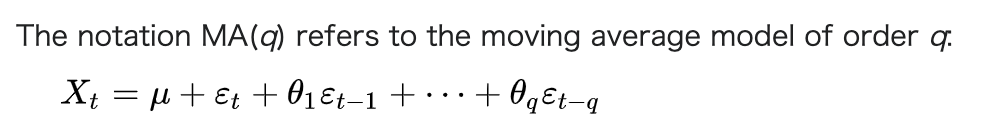

Xem lại mô hình AR để so sánh:
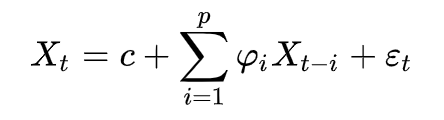

Ta thấy:
trong khi mô hình AR thể hiện mối quan hệ **X[t]** phụ thuộc vào các giá trị chuỗi thời gian trước đó như **X[t-1], X[t-2]**, ...
thì mô hình MA thể hiện rằng **X[t]** phụ thuộc vào các giá trị nhiễu.
Thực ra trong mô hình AR cũng có thành phần nhiễu epsilon(t), nhưng mối quan hệ của **X[t]** với epsilon(t) trong hai mô hình là hoàn toàn khác nhau.

Trong mô hình AR, ảnh hưởng của thành phần nhiễu kéo dài đến vô cùng, như biểu diễn dưới đây:
- **X[t]** bị ảnh hưởng bởi **epsilon(t)**
- **X[t+1]** bị ảnh hưởng bởi **X[t]** nên **X[t+1]** bị ảnh hưởng bởi epsilon(t)
...

- Lấy vị dụ như trong mô hình tài chính, ta mô hình hoá chỉ số thị trường chứng khoán, nếu **epsilon(t)** là tác động của khủng hoảng tài chính (tức là epsilon rất lớn) thì ảnh hưởng mà nó gây ra sẽ kéo dài rất lâu lên chỉ số thị trường.

- Trong khi đó ở mô hình MA, ảnh hưởng của thành phần nhiễu chỉ kéo dài trong khoảng thời gian q (bằng với bậc của mô hình MA), lý do vì trong mô hình MA ta không có mối quan hệ phụ thuộc giữa **X[t]** và **X[t-1]**.

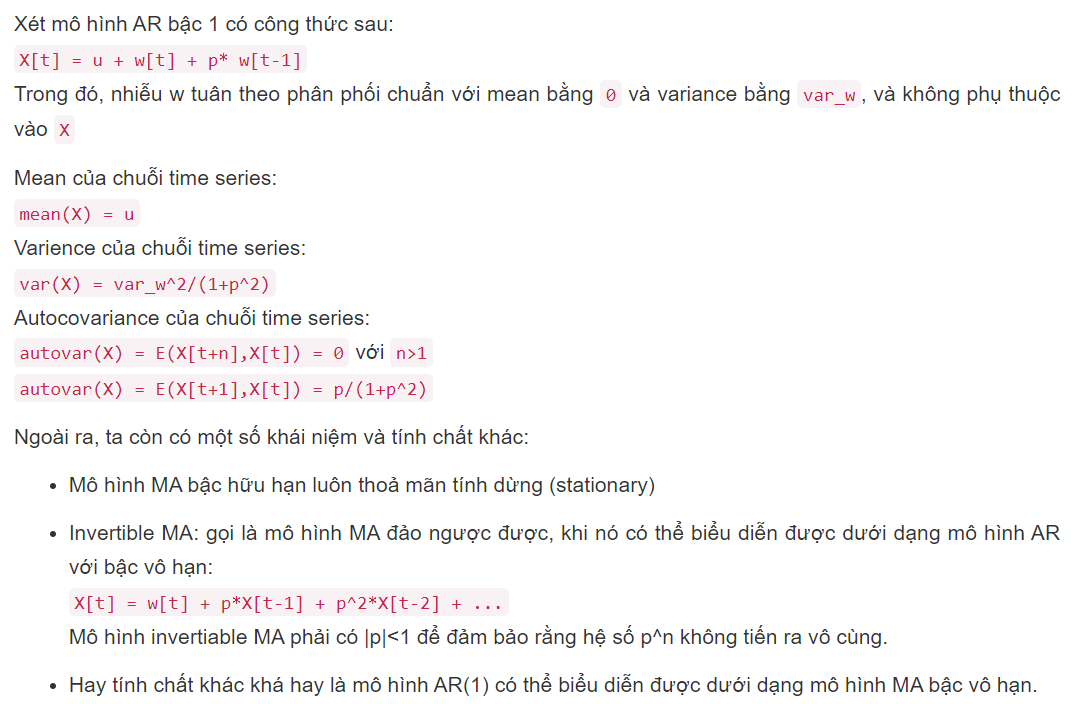

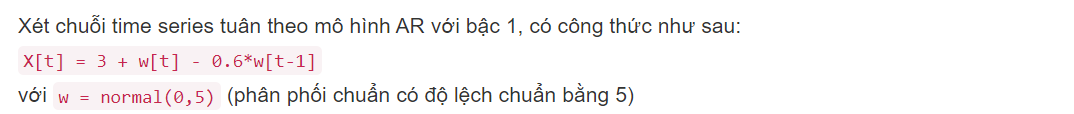

In [ ]:
u = 3
p = -0.6
T = 500
mean = u
w = np.random.normal(loc=0, scale=1, size=500)
data = np.zeros(500)
data[0] = 3 + w[0]
for i in range(1,500):
    data[i] = 3 + w[i] - 0.6*w[i-1]

In [ ]:
# fit model
from statsmodels.tsa.arima.model import ARIMA

# train ARMA
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

order = (3, 0, 12)          # order[1] = 0, because we don't use First order differencing
model = ARIMA(train, order=order)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficients: [ 2.90583330e+00  4.30412336e-01 -4.54021879e-01 -5.28731593e-01
 -3.23030861e-01  2.68691500e-01  2.56900832e-01 -2.70724222e-01
 -9.98254205e-02 -6.18780666e-01 -8.68396008e-02 -3.11149421e-01
  4.38652423e-01 -8.42469016e-02  2.21909404e-02  8.01304877e-01
  2.72708186e+02]
[ 2.98615095  0.0424724  -0.01333813 -0.70338846  0.9751122 ]


Như vậy các tham số predicted tương đối giống với tham số của mô hình thực tế (3, -0.6)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficients: [ 2.48741859e+00  4.62438745e-02 -8.64592049e-02 -2.40402983e-01
 -2.32416109e-01  2.30577978e-02 -1.07991400e-01 -3.86954070e-03
 -2.45087372e-01 -2.20617403e-01 -6.46512826e-02  4.22129603e-02
  9.86352961e-01  2.80012048e+02]
predicted=18.918120, expected=28.000000
predicted=-2.254449, expected=42.000000
predicted=25.969898, expected=11.000000
predicted=31.970894, expected=63.000000
predicted=53.556337, expected=87.000000
predicted=-9.984701, expected=-16.000000
predicted=-32.344367, expected=-98.000000
predicted=-14.049990, expected=-47.000000
predicted=1.935539, expected=-71.000000
predicted=35.668080, expected=42.000000
Test RMSE: 38.908


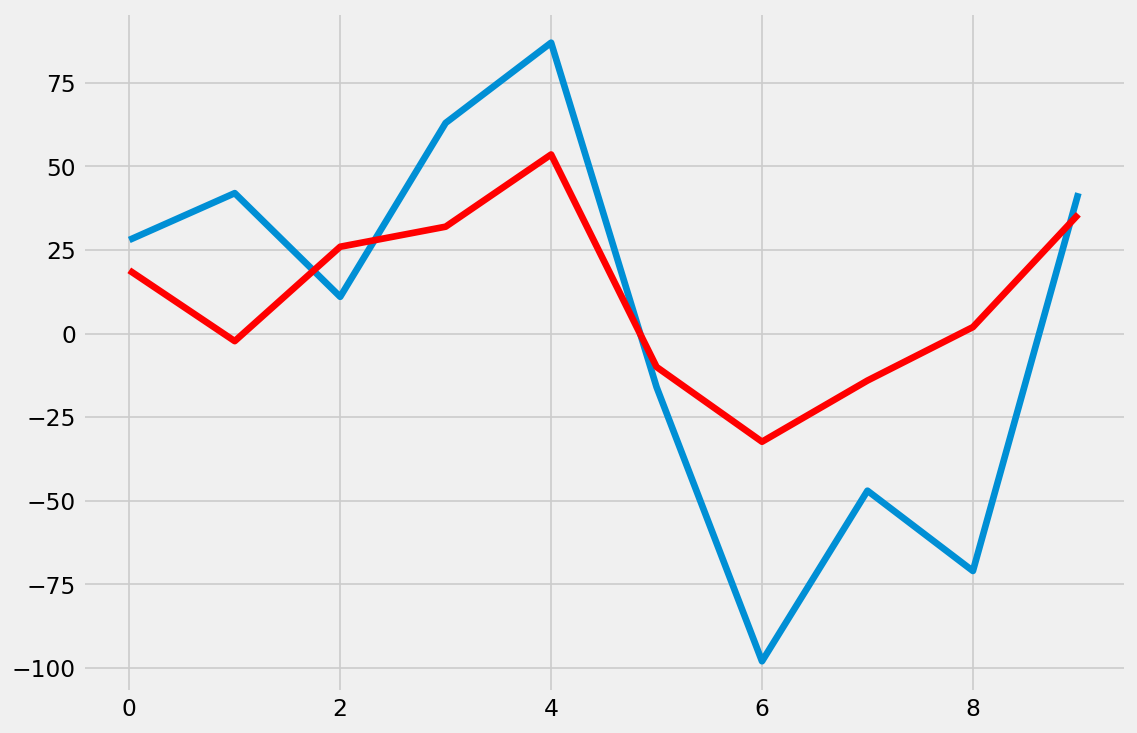

In [ ]:
# create and evaluate a MA
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train MA
model = ARIMA(train, order=(0, 0, 12))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARMA model

- Các mô hình autoregressive–moving-average (ARMA) cung cấp mô tả súc tích cho một quá trình ngẫu nhiên (weakly stationary) bằng hai đa thức, một cho autoregression và một cho moving average. Đây là sự kết hợp của các mô hình AR và MA.


### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub>

- Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficients: [ 2.46870988e+00  1.01376764e+00 -5.73989635e-01 -9.21087160e-01
  3.47315998e-01 -4.29726825e-02 -2.68804327e-01  8.65562800e-01
 -9.79946687e-01  4.31053978e+02]
predicted=9.348961, expected=28.000000
predicted=-5.047156, expected=42.000000
predicted=31.248794, expected=11.000000
predicted=13.553815, expected=63.000000
predicted=18.231870, expected=87.000000
predicted=1.896944, expected=-16.000000
predicted=-7.158819, expected=-98.000000
predicted=-6.963179, expected=-47.000000
predicted=-1.566932, expected=-71.000000
predicted=3.791313, expected=42.000000
Test RMSE: 51.577


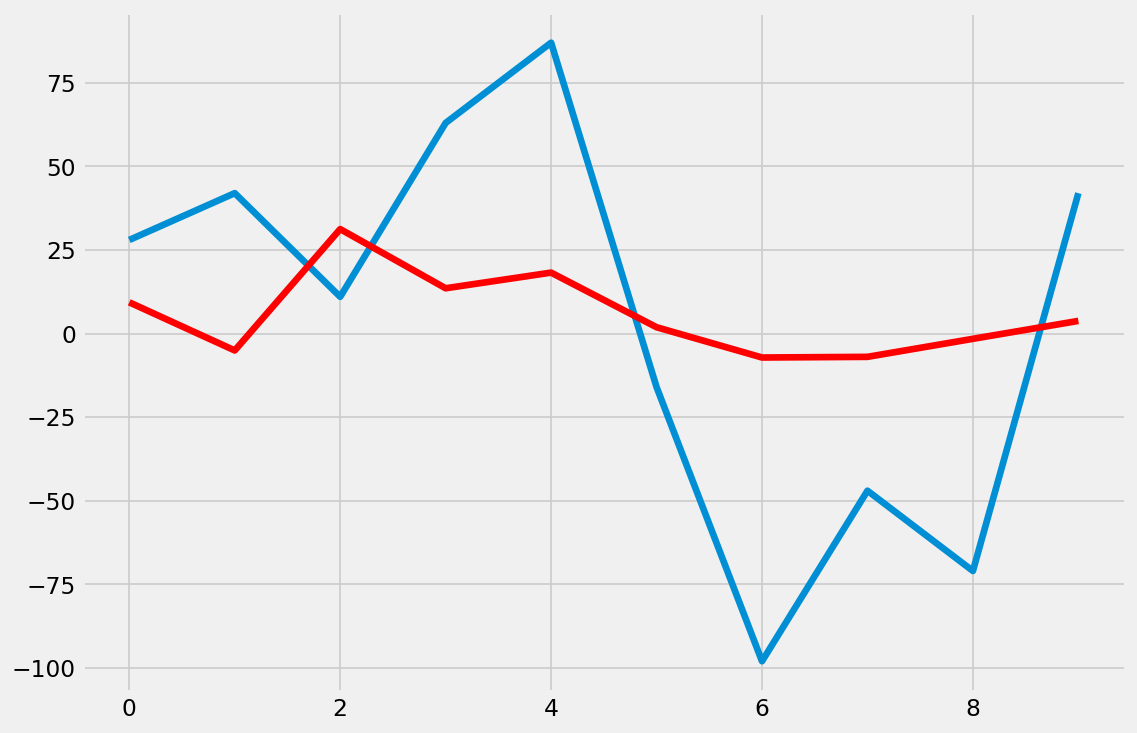

In [ ]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# fit model
model = ARIMA(train, order=(2, 0, 6))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARIMA model

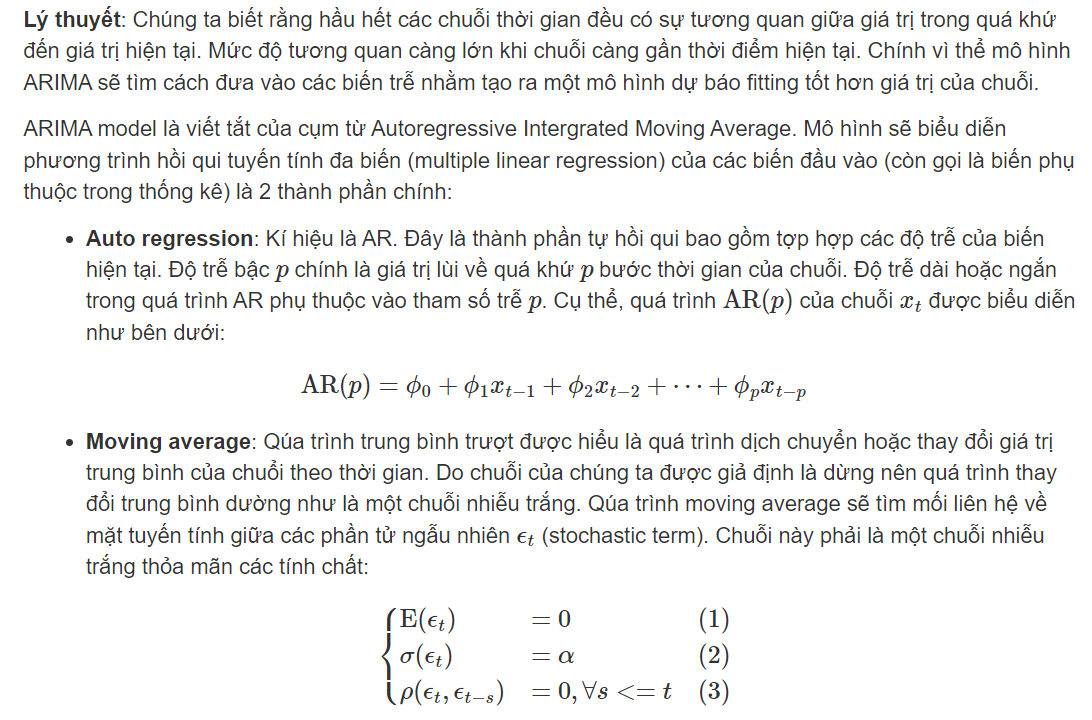

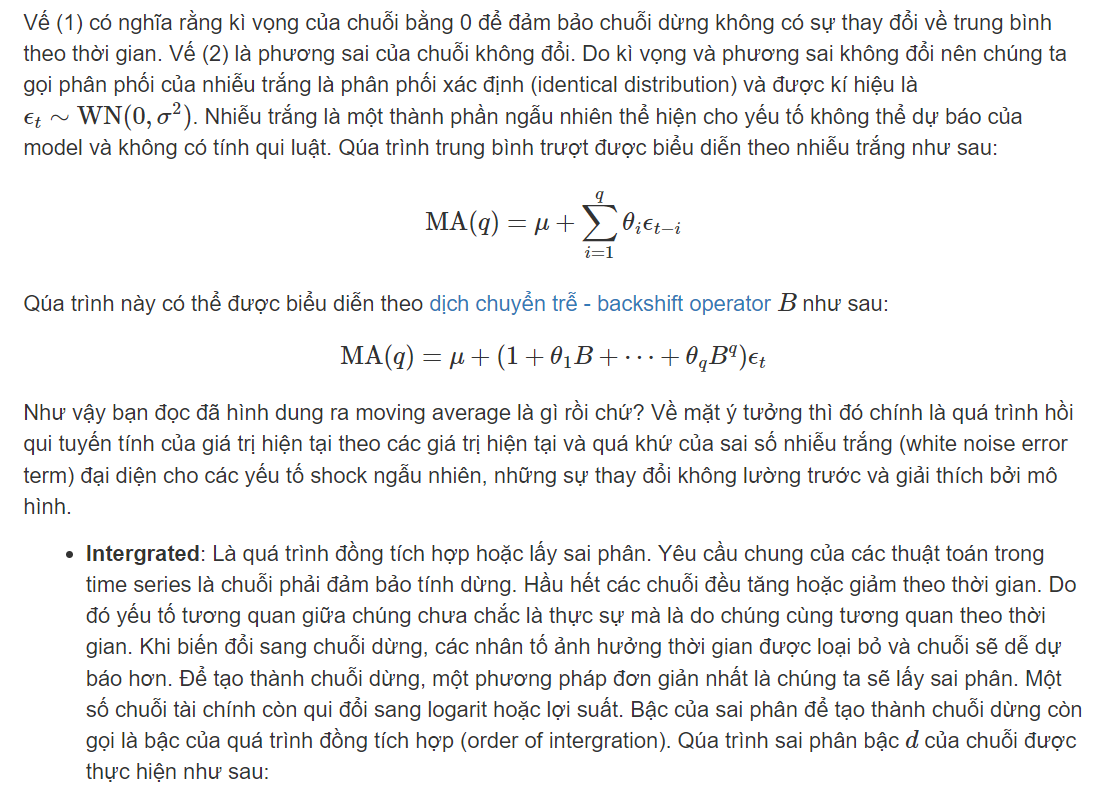

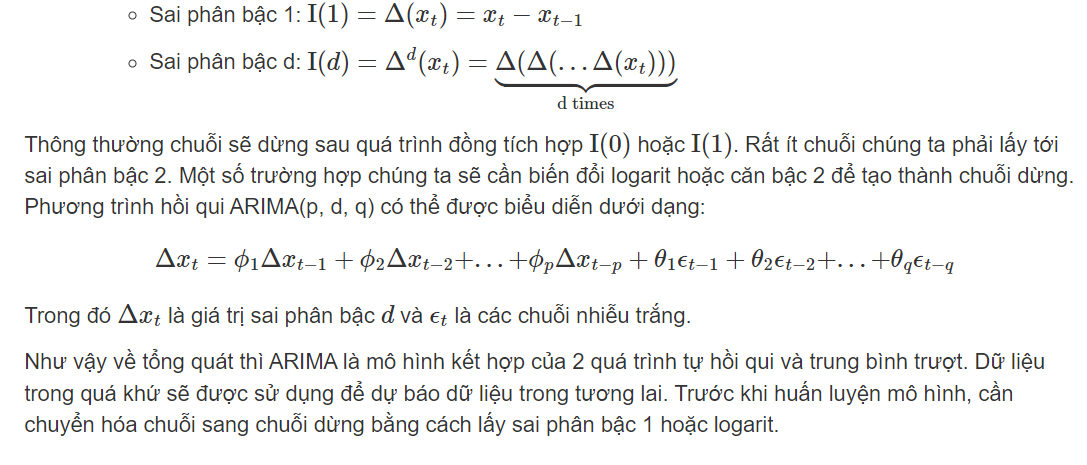

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficients: [ 2.50974639e+00  2.39742740e-01 -1.70720939e-01 -5.45093522e-01
 -2.06173518e-01 -2.65429124e-01  6.00713640e-01 -6.47164255e-01
 -4.75658649e-01  4.94620334e+02]
predicted=30.638607, expected=28.000000
predicted=-17.974095, expected=42.000000
predicted=-15.270545, expected=11.000000
predicted=31.885626, expected=63.000000
predicted=44.754688, expected=87.000000
predicted=17.314508, expected=-16.000000
predicted=-17.165617, expected=-98.000000
predicted=-27.762206, expected=-47.000000
predicted=-9.458718, expected=-71.000000
predicted=15.533363, expected=42.000000
ARIMA(3,0,5) --> AIC=1242.641699509738; BIC=1271.620097509247
Test RMSE: 44.214


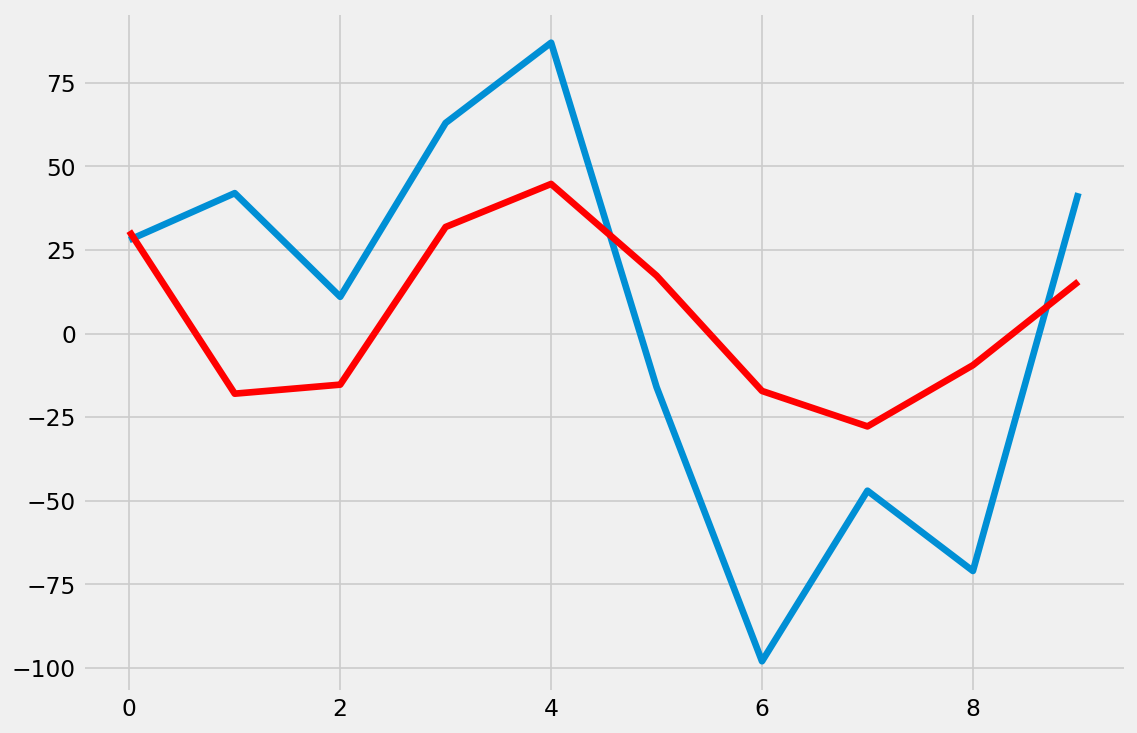

In [ ]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]
order = (3, 0, 5)

# fit model
model = ARIMA(train, order=order)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))


model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
print('{} --> AIC={}; BIC={}'.format(model_name, model_fit.aic, model_fit.bic))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[<statsmodels.tsa.arima.model.ARIMA object at 0x7dcf59343ee0>, (3, 0, 5), 1242.641699509738, 1271.620097509247]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[<statsmodels.tsa.arima.model.ARIMA object at 0x7dcf594be980>, (2, 0, 4), 1233.3760860410257, 1256.558804440633]
[<statsmodels.tsa.arima.model.ARIMA object at 0x7dcf593435b0>, (1, 0, 5), 1231.1538093081208, 1254.336527707728]
[<statsmodels.tsa.arima.model.ARIMA object at 0x7dcf59343670>, (2, 0, 3), 1263.2186523250928, 1283.5035309247492]
1231.1538093081208 1254.336527707728 [ 2.49430265e+00  6.11150951e-01 -5.10876077e-01 -3.81974476e-01
 -4.87019685e-01 -4.00479427e-01  9.50212104e-01  4.57388816e+02]
{'R2': 0.046660438626901835, 'MAPE': 0.9719065927362902, 'RMSE': 56.01532794647965}


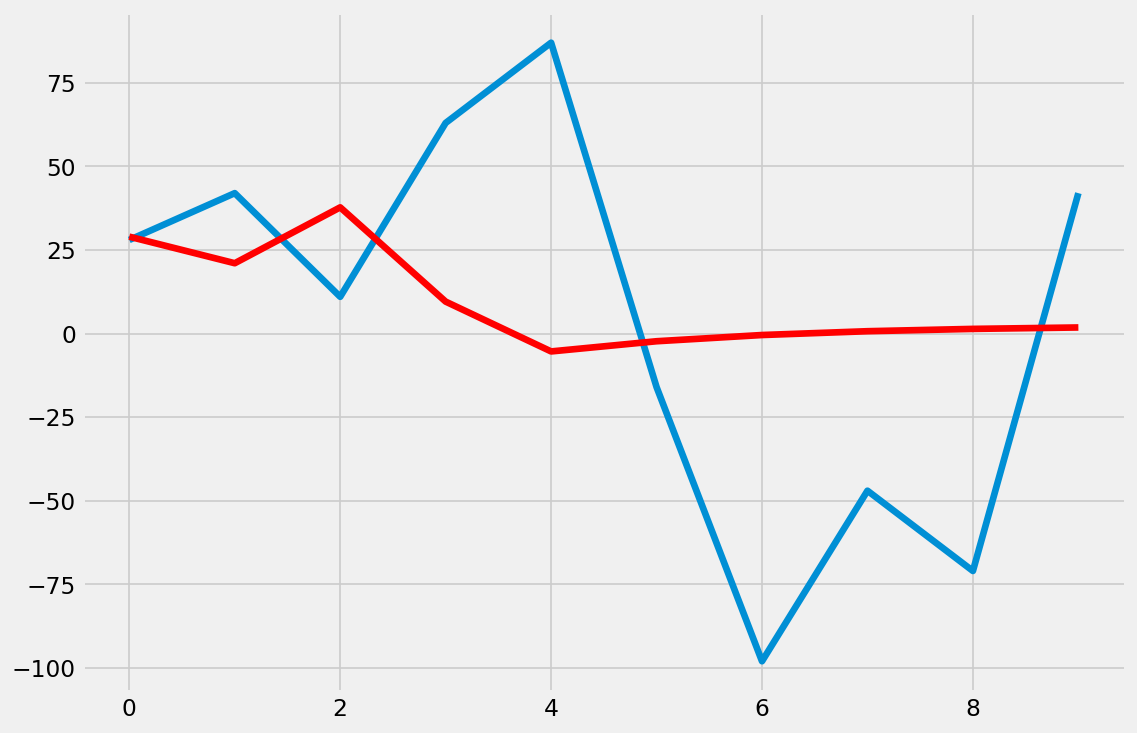

In [ ]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np

def get_metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

def get_best_model(list_orders, data):
    dict_models = {}
    for idx, order in enumerate(list_orders):
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        dict_models[idx] = [model, order, model_fit.aic, model_fit.bic, model_fit]
        print([model, order, model_fit.aic, model_fit.bic])
    list_models = sorted(dict_models.values(), key=lambda x: x[2])
    return list_models[0]

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# fit model
list_orders = [(3, 0, 5), (2, 0, 4), (1, 0, 5), (2, 0, 3)]
model = get_best_model(list_orders, train)
print(model[4].aic, model[4].bic, model[4].params)

# make predictions
y_pred = model[4].predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print(get_metrics(test, y_pred))

# plot results
plt.plot(test)
plt.plot(y_pred, color='red')
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1232.1388242586104 1252.3712681561626 [ 6.78225235e-01 -4.78284609e-01 -4.26997442e-01 -4.37600158e-01
 -4.68064180e-01  9.95648073e-01  4.95461258e+02]
{'R2': -0.07007203042765209, 'MAPE': 0.10600263322931003, 'RMSE': 75.75936341656372}


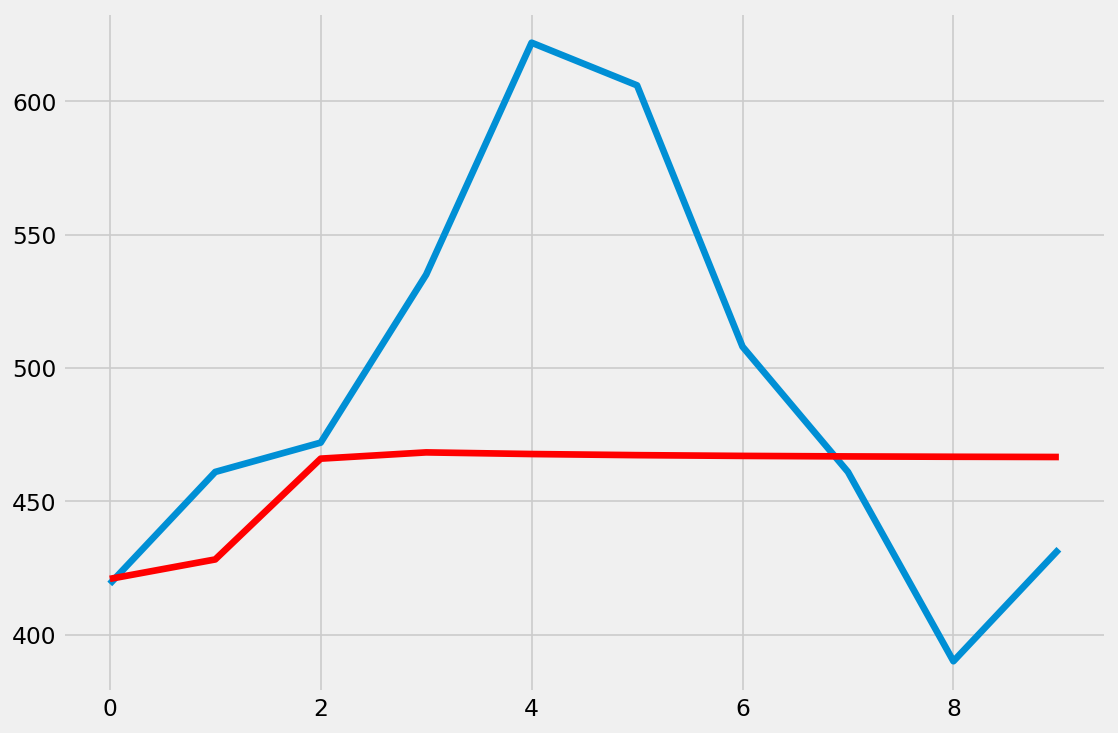

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def get_metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

def get_best_model(list_orders, data):
    dict_models = {}
    for idx, order in enumerate(list_orders):
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        dict_models[idx] = [model, order, model_fit, model_fit.bic]
    list_models = sorted(dict_models.values(), key=lambda x: x[3])
    return list_models[0]

# First Order Differencing
df = get_df()
dataset = df['#passengers'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# fit model
list_orders = [(3, 1, 5), (2, 1, 4), (1, 1, 5), (2, 1, 3)]
model = get_best_model(list_orders, train)
print(model[2].aic, model[2].bic, model[2].params)

# make predictions
y_pred = model[2].predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print(get_metrics(test, y_pred))

# plot results
plt.plot(test)
plt.plot(y_pred, color='red')
plt.show()

In [ ]:
d = {'one': [2, 'a'], 'three': [1, 'b'], 'five': [4, 'c'], 'two': [6, 'e'], 'four': [0, 'e']}
a = sorted(d.values(), key=lambda x: x[0])
print(a)

[[0, 'e'], [1, 'b'], [2, 'a'], [4, 'c'], [6, 'e']]


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  134
Model:                 ARIMA(3, 0, 5)   Log Likelihood                -611.321
Date:                Mon, 24 Apr 2023   AIC                           1242.642
Time:                        01:19:45   BIC                           1271.620
Sample:                             0   HQIC                          1254.418
                                - 134                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5097      0.124     20.202      0.000       2.266       2.753
ar.L1          0.2397      0.431      0.557      0.578      -0.605       1.084
ar.L2         -0.1707      0.360     -0.474      0.636      -0.877       0.536
ar.L3         -0.5451      0.328     -1.664      0.096      -1.187       0.097
ma.L1         -0.2062      0.473     -0.436      0.663      -1.134       0.721
ma.L2         -0.2654      0.484     -0.548      0.584      -1.215       0.684
ma.L3          0.6007      0.232      2.593      0.010       0.147       1.055
ma.L4         -0.6472      0.345     -1.873      0.061      -1.324       0.030
ma.L5         -0.4757      0.485     -0.981      0.326      -1.426       0.474
sigma2       494.6203    163.642      3.023      0.003     173.888     815.352
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.55   Prob(JB):                         0.81
Heteroskedasticity (H):               6.46   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Cách lựa chọn tham số



- 'p' là bậc của thành phần 'Auto Regressive' (AR). Nó đề cập đến số lượng lags của Y được sử dụng làm biến dự báo. Và 'q' là bậc của thành phần 'Moving Average' (MA). Nó đề cập đến số lượng sai số dự báo trễ (number of lagged forecast errors) cần được đưa vào mô hình ARIMA.


Một mô hình ARIMA được đặc trưng bởi 3 thuật ngữ: ARIMA (p, d, q)

- p là thứ tự (order) của thuật ngữ AR
- d là số lần khác biệt (differencing) cần thiết để làm cho chuỗi thời gian đó có tính stationarity
- q là thứ tự của thuật ngữ MA


Giá trị của d, do đó, là số lần khác biệt tối thiểu cần thiết để làm cho chuỗi thời gian có tính stationarity. Nếu chuỗi thời gian đã có tính stationary, thì d = 0.

- 'p' là thứ tự của thuật ngữ 'Auto Regressive' (AR). Nó đề cập đến số lượng lags của Y được sử dụng làm dự đoán. Và 'q' là thứ tự của thuật ngữ 'Moving Average' (MA). Nó đề cập đến số lượng lagged forecast errors nên được sử dụng trong mô hình ARIMA.





### Làm sao để tìm d

Mục đích của việc chênh lệch dữ liệu là để làm cho chuỗi thời gian trở nên stationary.

- Nhưng ta cần phải cẩn trọng để không chênh lệch quá mức chuỗi thời gian. Bởi vì, một chuỗi bị chênh lệch quá mức có thể vẫn stationary, điều này sẽ ảnh hưởng đến các tham số của mô hình.

Vậy làm thế nào để xác định đúng thứ tự chênh lệch (differencing)?


- Thứ tự chênh lệch đúng là số lượng chênh lệch tối thiểu để thu được một chuỗi gần stationary, đi lang thang quanh một giá trị trung bình xác định và đồ thị ACF hội tụ về 0 khá nhanh.

- Nếu các tự tương quan (autocorrelations) dương cho nhiều số lags (10 hoặc hơn), thì chuỗi cần được chênh lệch thêm. Ngược lại, nếu tự tương quan độ trễ 1 quá âm, thì chuỗi có thể đã bị chênh lệch quá mức.

- Trong trường hợp, bạn không thể quyết định giữa hai thứ tự chênh lệch, hãy chọn thứ tự cho ra độ lệch chuẩn (standard deviation) nhỏ nhất trong chuỗi đã được chênh lệch (differenced).


**Sử dụng ADF test để kiểm tra. Nếu chuỗi là stationary thì d=0, còn nếu là chuỗi non-stationary thì có thể d=1 hoặc d=2**


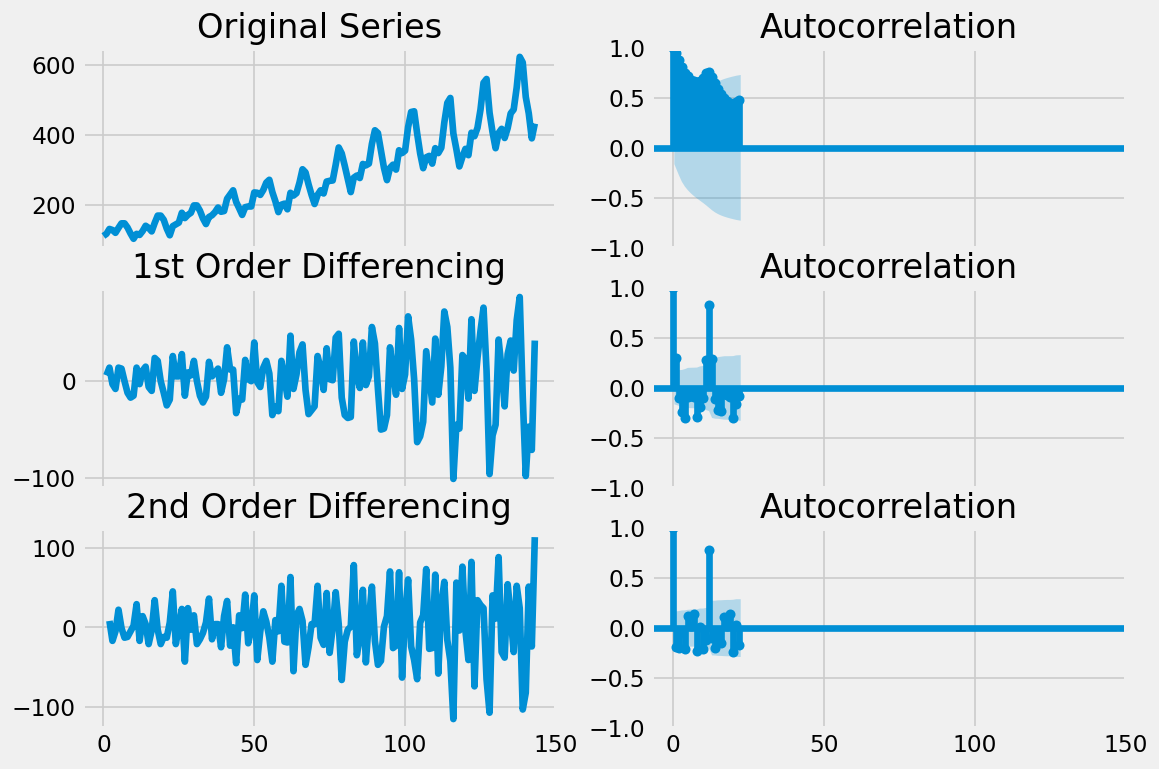

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import data
df = get_df()
df['value'] = df['#passengers']

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

- Đối với chuỗi thời gian trên, chuỗi thời gian đạt được tính ổn định với một lần sai khác (differencing). Nhưng khi nhìn vào đồ thị tương quan tự điều chỉnh cho sai khác bậc hai, ta thấy rằng độ trễ đi vào vùng tiêu cực rất nhanh, điều này cho thấy chuỗi có thể đã bị sai khác quá mức. **Vì vậy, chúng ta nên chọn d = 1.**

### Làm sao để tìm p (AR)

- Độ tương quan riêng (partial autocorrelation) của một độ trễ trong chuỗi dữ liệu được gọi là tương quan riêng phần (PACF). Nó được tính toán như tương quan giữa chuỗi và độ trễ của nó sau khi loại bỏ đóng góp từ các độ trễ trung gian.

- Vì vậy, PACF cho thấy sự tương quan thuần túy giữa một độ trễ và chuỗi dữ liệu. Từ đó, bạn sẽ biết liệu độ trễ đó cần thiết cho thuật ngữ AR hay không.

- Partial autocorrelation của lag (k) của chuỗi là hệ số mà lag đó trong phương trình của Y.




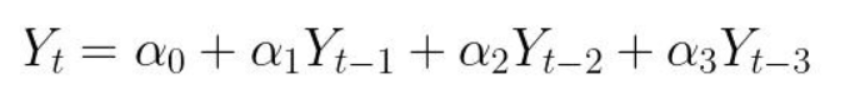

- Giả sử: Y_t là chuỗi hiện tại, Y_(t-1) là lag 1 của Y.
Vậy thì, Partial autocorrelation của lag 3, Y_(t-3) là hệ số a_3 của Y_(t-3) trong phương trình trên.

- Mọi autocorrelation trong chuỗi đã ổn định có thể được giải quyết bằng cách thêm đủ số lượng thuật ngữ AR. Vì vậy, ban đầu chúng ta lấy thứ tự của thuật ngữ AR bằng số lượng độ trễ vượt qua giới hạn ý nghĩa trong biểu đồ PACF.

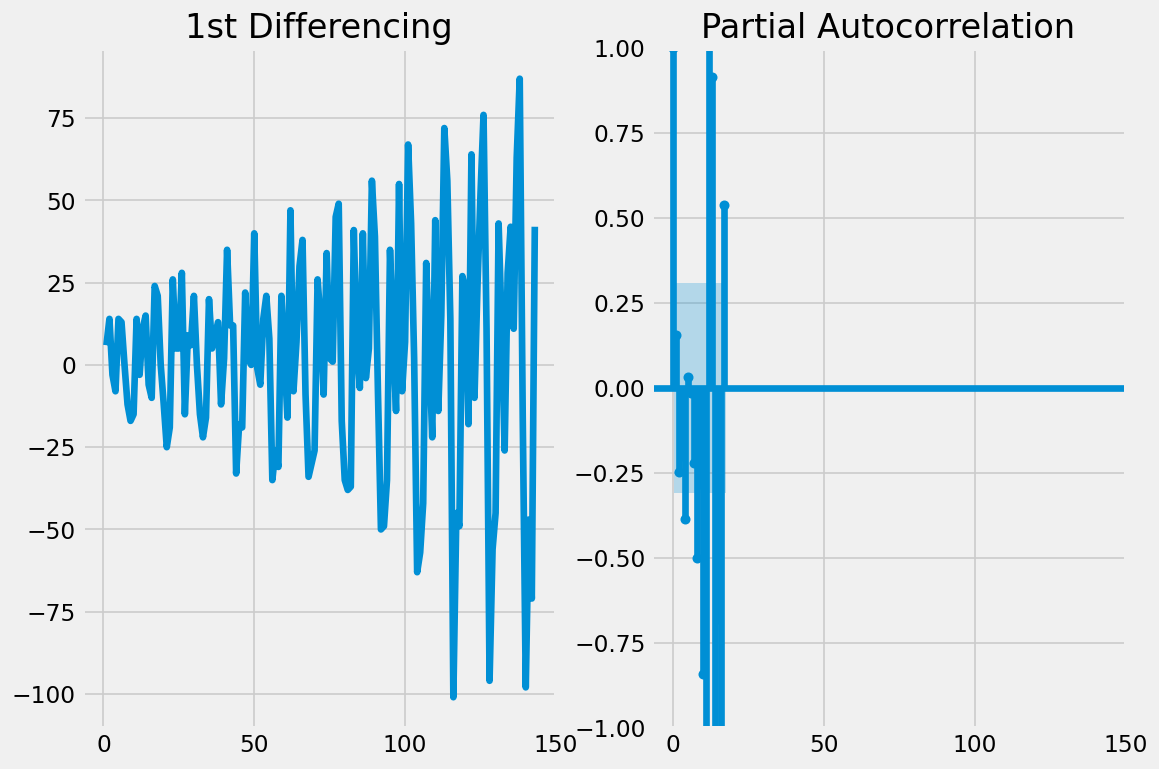

In [ ]:
# PACF plot of 1st differenced series

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna()[:40], ax=axes[1])

temp = df.value.diff().dropna()
plt.show()

**Bạn có thể quan sát được rằng giá trị PACF của lag 1 khá đáng kể vì nó nằm rất cao hơn đường giới hạn độ quan trọng. Lag 12 cũng quan trọng, tuy nhiên chỉ vượt qua ranh giới độ quan trọng (vùng màu xanh lam) một chút. Nhưng chúng ta sẽ sử dụng p = 1.**

### Làm sao để tìm q (MA)

- Để xác định số lượng thuật ngữ MA cần sử dụng để loại bỏ tất cả các tương quan tự lặp trong chuỗi đã chuẩn hóa, chúng ta có thể xem đến đồ thị ACF. Một thuật ngữ MA kỹ thuật là sai số dự báo có trễ.

- ACF cho biết số thuật ngữ MA cần thiết để loại bỏ bất kỳ tương quan tự lặp nào trong chuỗi đã chuẩn hóa.





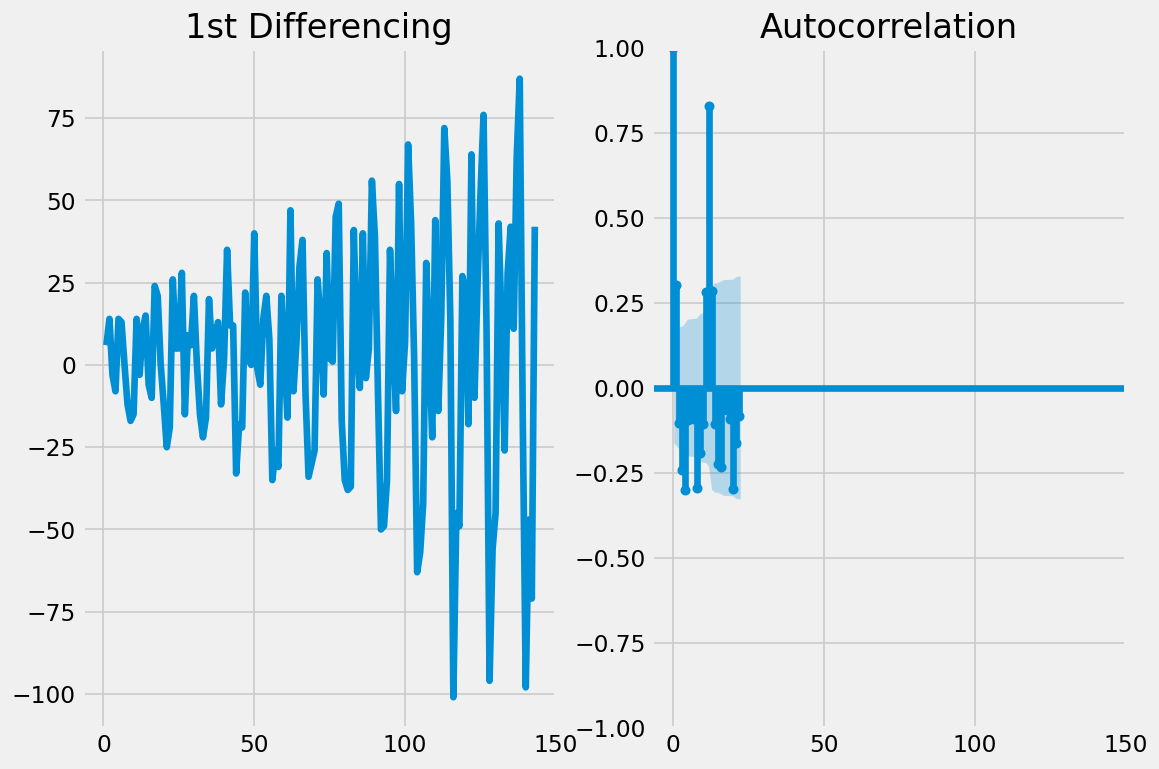

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])
plt.show()

**Một vài lags vượt quá đường giới hạn đáng kể. Vì vậy, hãy tạm thời giả định q bằng 1. Khi băn khoăn, hãy chọn mô hình đơn giản hơn nhưng đủ để giải thích Y.**

# Bài tập:

Chọn 1 bộ dữ liệu time-series bất kì trong đây [link text](https://github.com/thieu1995/csv-files), và lấy ra một cột time-series, xây dựng mô hình dự đoán dùng AR, MA, ARMA và ARIMA models.

Với yêu cầu các models bên trên phải được tối ưu hóa tham số mô hình, các mô hình được so sánh dựa trên giá trị AIC. Model nào có giá trị AIC càng nhỏ thì càng tốt. Tối ưu tham số bằng cách duyệt những giá trị có thể dùng for.


Sau đó so sánh kêt quả của 4 models đã được tối ưu tham số từ 4 mô hình bên trên dựa vào giá trị RMSE của tập test.



# **References**

1. https://blog.vietnamlab.vn/time-series-moving-average-model/
2. https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
3. https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
4. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
5. https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook
6. https://www.machinelearningplus.com/time-series/time-series-analysis-python/
7. https://otexts.com/fpp2/MA.html
8. https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
9. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
10. https://www.youtube.com/watch?v=FsroWpkUuYI&list=PLjwX9KFWtvNnOc4HtsvaDf1XYG3O5bv5s&index=1&ab_channel=AricLaBarr
